In [189]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
import seaborn as sns 
import qgrid
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import shapiro
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc

 



                              MINI SOMMAIRE



                     1- LES DONNÉES UTILISÉES POUR L’ÉTUDE 
                 
(p5_population.csv, P5_dispo_alim.csv, PIB5.csv,viande_volailleP5.csv)


                     2- SEGMENTATION DES PAYS
                     
Classification CAH avec les 4 variables OC ('propor_anim_alim_pays', 'dispo_alim_prot/hab','dispo_alim_kcal/hab','%_difference_pop')

                    3- Caractériser la segmentation avec des variables complémentaires
                
('PIB/habitant_$','Dispo_alim (Kcal/personne/jour)_VOLAILLE','Dispo_pro_quant (g/personne/jour)_VOLAILLE',
'Import-Quant_VOLAILLE_MT', 'Nourriture_VOLAILLE_MT', 'Stabilité')

                    4- Choix de la liste de pays par rapport à une methode de scoring
                    
Attribution de coefficient aux variables les plus significatives 
Une liste de 10 pays pour exportation de la production de poulet
 


                    5- ACP
                    
Projections des 4 variables OC et les clusters 

                   
                   
                   6- Vérification que les clusters soit différents 
                   
                Normalité                 
 - Utilisation de la variable %_difference_pop
 - test de normalité sur %_difference_pop
 
               Variance 
 - test variance sur différents clusters avec variable %_difference_pop (Levene)
 
               Différence pour au moins 1 cluster 
 
 - Anova pour déterminer si il existe une différence significative entre les clusters
 -  Test de Kruskal-Wallis H dans le cas ou les variances ne sont pas égales pour chaque comparaisons entre clusters
               
               Comparaison entre 2 clusters (cluster 1 et cluster 2)dans le cas Gaussien et variance égales
 
 - test comparaison de deux clusters avec  (dans le cas gaussien) avec ttest_ind
 
 
                Comparaison multiples non paramétrique (Tous les clusters n'ont pas la variance égales )
                
 - test Test U de Mann-Whitney non parametrique (boucle for)
 

In [190]:
# Lire les datasets population et dispo alim
pop = pd.read_csv('p5_population.csv')
dispo_alim = pd.read_csv('P5_dispo_alim.csv')
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2016,2016,1000 personnes,35383.03,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296.11,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,511,Population totale,2501,Population,2016,2016,1000 personnes,56207.65,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,511,Population totale,2501,Population,2017,2017,1000 personnes,57009.76,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,3,Albanie,511,Population totale,2501,Population,2016,2016,1000 personnes,2886.44,S,Données standardisées


In [191]:
# 340 lignes et 14 colonnes 
pop.shape

(340, 14)

In [192]:
#Les pays uniques
pop['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [193]:
# Il y a 170 pays unique
pop['Zone'].nunique()

170

In [194]:
# La table dispo Alim
dispo_alim.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2016,2016,Kcal/personne/jour,1806.00,Fc,Donnée calculée
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2903,Produits Vegetaux,2016,2016,g/personne/jour,44.04,Fc,Donnée calculée
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2017,2017,Kcal/personne/jour,1809.00,Fc,Donnée calculée
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2903,Produits Vegetaux,2017,2017,g/personne/jour,43.54,Fc,Donnée calculée
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2016,2016,Kcal/personne/jour,195.00,Fc,Donnée calculée
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2016,2016,g/personne/jour,10.52,Fc,Donnée calculée
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,191.00,Fc,Donnée calculée
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,10.55,Fc,Donnée calculée
8,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2016,2016,Kcal/personne/jour,2495.00,Fc,Donnée calculée
9,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2903,Produits Vegetaux,2016,2016,g/personne/jour,47.82,Fc,Donnée calculée


In [195]:
# Les pays uniques sur la table dispo_alim
dispo_alim['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [196]:
# Il y a 172 pays uniques
dispo_alim['Zone'].nunique()

172

In [197]:
print(dispo_alim['Zone'].nunique())
print(pop['Zone'].nunique())

172
170


### différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;

In [198]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2016,2016,1000 personnes,35383.03,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296.11,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,511,Population totale,2501,Population,2016,2016,1000 personnes,56207.65,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,511,Population totale,2501,Population,2017,2017,1000 personnes,57009.76,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,3,Albanie,511,Population totale,2501,Population,2016,2016,1000 personnes,2886.44,S,Données standardisées


In [199]:
# Création colonne croissance population 
pop1 = pd.pivot_table(pop, values='Valeur', index=['Code zone','Zone', 'Produit', 'Unité'],
                    columns=['Année'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)

pop1['%_difference_pop'] = ((pop1[2017]-pop1[2016])/pop1[2016])*100
pop1.head(10)


,Code zone,Zone,Produit,Unité,2016,2017,%_difference_pop
0,1,Arménie,Population,1000 personnes,2936.14,2944.79,0.294604
1,2,Afghanistan,Population,1000 personnes,35383.03,36296.11,2.580559
2,3,Albanie,Population,1000 personnes,2886.44,2884.17,-0.078644
3,4,Algérie,Population,1000 personnes,40551.39,41389.19,2.066020
4,7,Angola,Population,1000 personnes,28842.49,29816.77,3.377933
5,8,Antigua-et-Barbuda,Population,1000 personnes,94.53,95.43,0.952079
6,9,Argentine,Population,1000 personnes,43508.46,43937.14,0.985280
7,10,Australie,Population,1000 personnes,24262.71,24584.62,1.326769
8,11,Autriche,Population,1000 personnes,8747.30,8819.90,0.829970
9,12,Bahamas,Population,1000 personnes,377.93,381.75,1.010769


### proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;


In [200]:
dispo_alim['Description du Symbole'].unique()

array(['Donnée calculée'], dtype=object)

In [201]:
# Remodeler la table dispo_alim
dispo_alim1 = pd.pivot_table(dispo_alim, values='Valeur', index=['Code zone','Zone','Élément', 'Année'],
                    columns=['Produit'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)

# Supprimer année 2016
dispo_alim1 = dispo_alim1[dispo_alim1["Année"]==2017]
dispo_alim1

,Code zone,Zone,Élément,Année,Produits Animaux,Produits Vegetaux
1,1,Arménie,Disponibilité alimentaire (Kcal/personne/jour),2017,790.00,2288.00
3,1,Arménie,Disponibilité de protéines en quantité (g/pers...,2017,44.57,52.81
5,2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),2017,191.00,1809.00
7,2,Afghanistan,Disponibilité de protéines en quantité (g/pers...,2017,10.55,43.54
9,3,Albanie,Disponibilité alimentaire (Kcal/personne/jour),2017,1094.00,2305.00
...,...,...,...,...,...,...
679,272,Serbie,Disponibilité de protéines en quantité (g/pers...,2017,40.02,42.49
681,273,Monténégro,Disponibilité alimentaire (Kcal/personne/jour),2017,1227.00,2254.00
683,273,Monténégro,Disponibilité de protéines en quantité (g/pers...,2017,68.67,44.64
685,276,Soudan,Disponibilité alimentaire (Kcal/personne/jour),2017,388.00,2045.00


In [202]:
# création table disponibilité alimentaire animale
dispo_alim1_anim= pd.pivot_table(dispo_alim1, values='Produits Animaux', index=['Zone'],
                    columns=['Élément'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)
# Renommer les colonnes 
dispo_alim1_anim = dispo_alim1_anim.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilité alimentaire (Kcal/personne/jour)_anim','Disponibilité de protéines en quantité (g/personne/jour)':'Disponibilité de protéines en quantité (g/personne/jour)_anim' })
dispo_alim1_anim


,Zone,Disponibilité alimentaire (Kcal/personne/jour)_anim,Disponibilité de protéines en quantité (g/personne/jour)_anim
0,Afghanistan,191.0,10.55
1,Afrique du Sud,456.0,34.56
2,Albanie,1094.0,66.34
3,Algérie,404.0,25.71
4,Allemagne,1093.0,63.08
...,...,...,...
167,Émirats arabes unis,596.0,43.83
168,Équateur,504.0,29.94
169,États-Unis d'Amérique,1026.0,73.87
170,Éthiopie,93.0,5.85


In [203]:
#Création table disponibilité alimentaire végétal
dispo_alim1_veg= pd.pivot_table(dispo_alim1, values='Produits Vegetaux', index=['Zone'],
                    columns=['Élément'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)
# Renommer colonnes 
dispo_alim1_veg = dispo_alim1_veg.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilité alimentaire (Kcal/personne/jour)_vege','Disponibilité de protéines en quantité (g/personne/jour)':'Disponibilité de protéines en quantité (g/personne/jour)_vege' })
dispo_alim1_veg


,Zone,Disponibilité alimentaire (Kcal/personne/jour)_vege,Disponibilité de protéines en quantité (g/personne/jour)_vege
0,Afghanistan,1809.0,43.54
1,Afrique du Sud,2538.0,48.85
2,Albanie,2305.0,53.21
3,Algérie,2945.0,67.21
4,Allemagne,2463.0,41.13
...,...,...,...
167,Émirats arabes unis,2770.0,63.51
168,Équateur,2082.0,35.84
169,États-Unis d'Amérique,2740.0,39.86
170,Éthiopie,2210.0,59.80


In [204]:
# Merge entre table dispo_alim1_veg et dispo_alim1_anim
#proportion de protéines d'origine animale par rapport à 
#la quantité totale de protéines 
#dans
#la disponibilité alimentaire du pays ;

dispo_ALIM = dispo_alim1_veg.merge(dispo_alim1_anim, on= 'Zone', how='left')
dispo_ALIM.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_vege,Disponibilité de protéines en quantité (g/personne/jour)_vege,Disponibilité alimentaire (Kcal/personne/jour)_anim,Disponibilité de protéines en quantité (g/personne/jour)_anim
0,Afghanistan,1809.0,43.54,191.0,10.55
1,Afrique du Sud,2538.0,48.85,456.0,34.56
2,Albanie,2305.0,53.21,1094.0,66.34
3,Algérie,2945.0,67.21,404.0,25.71
4,Allemagne,2463.0,41.13,1093.0,63.08


In [205]:
# Ouzbékistan et république démocratique populaire lao sont dans la table dispo alim
dispo_ALIM[dispo_ALIM['Zone'].isin(['Ouzbékistan','République démocratique populaire lao'])]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)_vege,Disponibilité de protéines en quantité (g/personne/jour)_vege,Disponibilité alimentaire (Kcal/personne/jour)_anim,Disponibilité de protéines en quantité (g/personne/jour)_anim
113,Ouzbékistan,2370.0,56.08,652.0,37.46
130,République démocratique populaire lao,2756.0,63.10,292.0,20.10


In [206]:
#Ouzbékistan et république démocratique populaire lao ne sont pas dans la table population
pop[pop['Zone'].isin(['Ouzbékistan','République démocratique populaire lao'])]


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [207]:
#Projections des colonnes zone et %_difference_pop
pop2 = pop1[['Zone', 2017,'%_difference_pop']]
pop2.head()

,Zone,2017,%_difference_pop
0,Arménie,2944.79,0.294604
1,Afghanistan,36296.11,2.580559
2,Albanie,2884.17,-0.078644
3,Algérie,41389.19,2.066020
4,Angola,29816.77,3.377933


In [208]:
#merge entre les dispo alimentaires et les populations
dispo_pop = dispo_ALIM.merge(pop2, on= 'Zone', how='left')
dispo_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_vege,Disponibilité de protéines en quantité (g/personne/jour)_vege,Disponibilité alimentaire (Kcal/personne/jour)_anim,Disponibilité de protéines en quantité (g/personne/jour)_anim,2017,%_difference_pop
0,Afghanistan,1809.0,43.54,191.0,10.55,36296.11,2.580559
1,Afrique du Sud,2538.0,48.85,456.0,34.56,57009.76,1.427048
2,Albanie,2305.0,53.21,1094.0,66.34,2884.17,-0.078644
3,Algérie,2945.0,67.21,404.0,25.71,41389.19,2.066020
4,Allemagne,2463.0,41.13,1093.0,63.08,82658.41,0.565298


In [209]:
#proportion de protéines d'origine animale par rapport à la quantité totale de protéines
#dans la disponibilité
#alimentaire du pays ;

dispo_pop['dispo_total_anim_pays'] = (dispo_pop['Disponibilité de protéines en quantité (g/personne/jour)_anim']*365)*(dispo_pop[2017]*1000)
dispo_pop['dispo_total_vege_pays'] = (dispo_pop['Disponibilité de protéines en quantité (g/personne/jour)_vege']*365)*(dispo_pop[2017]*1000)
dispo_pop['propor_anim_alim_pays'] = dispo_pop['dispo_total_anim_pays']/(dispo_pop['dispo_total_anim_pays']+dispo_pop['dispo_total_vege_pays'])

#disponibilité alimentaire en protéines par habitant
dispo_pop['dispo_alim_prot/hab'] = (dispo_pop['Disponibilité de protéines en quantité (g/personne/jour)_vege']+dispo_pop['Disponibilité de protéines en quantité (g/personne/jour)_anim'])*365

#disponibilité alimentaire en calories par habitant.
dispo_pop['dispo_alim_kcal/hab'] = (dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)_vege']+dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)_anim'])*365
dispo_pop.head(50)
                                                                                           

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_vege,Disponibilité de protéines en quantité (g/personne/jour)_vege,Disponibilité alimentaire (Kcal/personne/jour)_anim,Disponibilité de protéines en quantité (g/personne/jour)_anim,2017,%_difference_pop,dispo_total_anim_pays,dispo_total_vege_pays,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab
0,Afghanistan,1809.0,43.54,191.0,10.55,36296.11,2.580559,1.397672e+11,5.768214e+11,0.195045,19742.85,730000.0
1,Afrique du Sud,2538.0,48.85,456.0,34.56,57009.76,1.427048,7.191439e+11,1.016498e+12,0.414339,30444.65,1092810.0
2,Albanie,2305.0,53.21,1094.0,66.34,2884.17,-0.078644,6.983758e+10,5.601534e+10,0.554914,43635.75,1240635.0
3,Algérie,2945.0,67.21,404.0,25.71,41389.19,2.066020,3.884024e+11,1.015345e+12,0.276690,33915.80,1222385.0
4,Allemagne,2463.0,41.13,1093.0,63.08,82658.41,0.565298,1.903144e+12,1.240905e+12,0.605316,38036.65,1297940.0
5,Angola,2057.0,37.63,213.0,16.48,29816.77,3.377933,1.793538e+11,4.095318e+11,0.304565,19750.15,828550.0
6,Antigua-et-Barbuda,1683.0,27.39,747.0,54.06,95.43,0.952079,1.883015e+09,9.540471e+08,0.663720,29729.25,886950.0
7,Arabie saoudite,2710.0,50.53,485.0,37.01,33101.18,2.027312,4.471523e+11,6.105000e+11,0.422778,31952.10,1166175.0
8,Argentine,2267.0,37.01,971.0,65.69,43937.14,0.985280,1.053474e+12,5.935314e+11,0.639630,37485.50,1181870.0
9,Arménie,2288.0,52.81,790.0,44.57,2944.79,0.294604,4.790599e+10,5.676274e+10,0.457692,35543.70,1123470.0


In [210]:
# Projections des colonnes pour l'échantillon
echantillon = dispo_pop[['Zone','propor_anim_alim_pays','dispo_alim_prot/hab','dispo_alim_kcal/hab', '%_difference_pop']]
echantillon


,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
0,Afghanistan,0.195045,19742.85,730000.0,2.580559
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048
2,Albanie,0.554914,43635.75,1240635.0,-0.078644
3,Algérie,0.276690,33915.80,1222385.0,2.066020
4,Allemagne,0.605316,38036.65,1297940.0,0.565298
...,...,...,...,...,...
167,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363
168,Équateur,0.455154,24009.70,943890.0,1.784233
169,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454
170,Éthiopie,0.089109,23962.25,840595.0,2.699196


In [211]:
# Voir si il y a des valeur valeurs manquantes
#echantillon.isna().sum()/dispo_pop.shape[0]
echantillon.isna().sum()/echantillon.shape[0]

Zone                     0.000000
propor_anim_alim_pays    0.011628
dispo_alim_prot/hab      0.000000
dispo_alim_kcal/hab      0.000000
%_difference_pop         0.011628
dtype: float64

In [212]:
# Supprimer Ouzbékistan','République démocratique populaire lao'
echantillon1 = echantillon[~echantillon['Zone'].isin(['Ouzbékistan','République démocratique populaire lao'])]
echantillon1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
0,Afghanistan,0.195045,19742.85,730000.0,2.580559
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048
2,Albanie,0.554914,43635.75,1240635.0,-0.078644
3,Algérie,0.276690,33915.80,1222385.0,2.066020
4,Allemagne,0.605316,38036.65,1297940.0,0.565298
...,...,...,...,...,...
167,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363
168,Équateur,0.455154,24009.70,943890.0,1.784233
169,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454
170,Éthiopie,0.089109,23962.25,840595.0,2.699196


### Création 2 eme échantillon avec variable PIB/habitant

In [213]:
# echantillon1 170 pays 
echantillon1['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongri

In [214]:
#Vérification des pays qui sont sur la table pib et echantillon1
#télécharger table PIB5 
pib = pd.read_csv('PIB5.csv')
pib = pib[pib['Année']==2017]
pib.isna().sum()/pib.shape[0]
PIB1= pib[pib['Zone'].isin(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongrie', 'Inde', 'Indonésie', "Iran (République islamique d')",
       'Iraq', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque',
       'Japon', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan',
       'Kiribati', 'Koweït', 'Lesotho', 'Lettonie', 'Liban', 'Libéria',
       'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Madagascar',
       'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Maroc',
       'Maurice', 'Mauritanie', 'Mexique', 'Mongolie', 'Monténégro',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger',
       'Nigéria', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande',
       'Népal', 'Oman', 'Ouganda', 'Pakistan', 'Panama', 'Paraguay',
       'Pays-Bas', 'Philippines', 'Pologne', 'Polynésie française',
       'Portugal', 'Pérou', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Rwanda',
       'République centrafricaine', 'République de Corée',
       'République de Moldova', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Slovaquie',
       'Slovénie', 'Soudan', 'Sri Lanka', 'Suisse', 'Suriname', 'Suède',
       'Sénégal', 'Tadjikistan', 'Tchad', 'Tchéquie', 'Thaïlande',
       'Timor-Leste', 'Togo', 'Trinité-et-Tobago', 'Tunisie',
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen',
       'Zambie', 'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur',
       "États-Unis d'Amérique", 'Éthiopie', 'Îles Salomon'])]

In [215]:
#Les pays uniques de la table PIB ( 169 pays )
PIB1['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark', 'Djibouti',
       'Dominique', 'Égypte', 'El Salvador', 'Émirats arabes unis',
       'Équateur', 'Espagne', 'Estonie', 'Eswatini',
       "États-Unis d'Amérique", 'Éthiopie', 'Fédération de Russie',
       'Fidji', 'Finlande', 'France', 'Gabon', 'Gambie', 'Géorgie',
       'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guinée',
       'G

In [216]:
# Chine, Taiwan Province de n'est pas sur la table PIB 

echantillon1[~echantillon1['Zone'].isin(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark', 'Djibouti',
       'Dominique', 'Égypte', 'El Salvador', 'Émirats arabes unis',
       'Équateur', 'Espagne', 'Estonie', 'Eswatini',
       "États-Unis d'Amérique", 'Éthiopie', 'Fédération de Russie',
       'Fidji', 'Finlande', 'France', 'Gabon', 'Gambie', 'Géorgie',
       'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Haïti', 'Honduras', 'Hongrie',
       'Îles Salomon', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Iraq', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan',
       'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho',
       'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Luxembourg',
       'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi',
       'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie',
       'Mexique', 'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar',
       'Namibie', 'Népal', 'Nicaragua', 'Niger', 'Nigéria', 'Norvège',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Ouganda',
       'Pakistan', 'Panama', 'Paraguay', 'Pays-Bas', 'Pérou',
       'Philippines', 'Pologne', 'Polynésie française', 'Portugal',
       'République centrafricaine', 'République de Corée',
       'République de Moldova', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Rwanda',
       'Sainte-Lucie', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Samoa', 'Sao Tomé-et-Principe',
       'Sénégal', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie',
       'Soudan', 'Sri Lanka', 'Suède', 'Suisse', 'Suriname',
       'Tadjikistan', 'Tchad', 'Tchéquie', 'Thaïlande', 'Timor-Leste',
       'Togo', 'Trinité-et-Tobago', 'Tunisie', 'Turkménistan', 'Turquie',
       'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen',
       'Zambie', 'Zimbabwe'])]

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
33,"Chine, Taiwan Province de",0.495218,31295.1,1086240.0,0.238587


In [217]:
#Supprimer pays chine taiwan province de 
echantillon_1 = echantillon1[echantillon1['Zone']!='Chine, Taiwan Province de']
echantillon_1= echantillon_1.reset_index().drop(['index'], axis=1)
echantillon_1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
0,Afghanistan,0.195045,19742.85,730000.0,2.580559
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048
2,Albanie,0.554914,43635.75,1240635.0,-0.078644
3,Algérie,0.276690,33915.80,1222385.0,2.066020
4,Allemagne,0.605316,38036.65,1297940.0,0.565298
...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363
165,Équateur,0.455154,24009.70,943890.0,1.784233
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454
167,Éthiopie,0.089109,23962.25,840595.0,2.699196


In [218]:
#Projections sur la ta PIB pour garder que les colonnes utiles 
PIB1 = PIB1.reset_index().drop(['index'], axis=1)
PIB1 = PIB1[['Zone', 'Valeur']].rename(columns={'Valeur': 'PIB/habitant_$'})
PIB1


,Zone,PIB/habitant_$
0,Afghanistan,605.557362
1,Afrique du Sud,6153.459018
2,Albanie,4445.132198
3,Algérie,4051.244377
4,Allemagne,44642.742052
...,...,...
164,Venezuela (République bolivarienne du),7756.479109
165,Viet Nam,2342.244006
166,Yémen,854.926716
167,Zambie,1513.276090


In [219]:
# 2 eme échantillon avec colonne PIB/habitant
echantillon2  = echantillon_1.merge(PIB1, on= 'Zone', how='left')
echantillon2 

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,PIB/habitant_$
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,605.557362
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,6153.459018
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,4445.132198
3,Algérie,0.276690,33915.80,1222385.0,2.066020,4051.244377
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,44642.742052
...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,40180.344045
165,Équateur,0.455154,24009.70,943890.0,1.784233,6273.488892
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,60159.823417
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,731.580209


### creation 3 éme échantillon avec volaille

In [220]:
#Création table Volaille_4
volaille = pd.read_csv('viande_volailleP5.csv')
volaille1 = volaille[volaille['Description du Symbole']!='Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées']

volaille_4 = pd.pivot_table(volaille1, values='Valeur', index=['Code zone','Zone','Produit', 'Année'],
                    columns=['Élément'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Importations - Quantité','Nourriture' ]]

volaille_4= volaille_4.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo_alim (Kcal/personne/jour)_VOLAILLE','Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo_pro_quant (g/personne/jour)_VOLAILLE', 'Importations - Quantité':'Import-Quant_VOLAILLE_MT','Nourriture':'Nourriture_VOLAILLE_MT'})
volaille_4


,Zone,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT
0,Arménie,54.0,5.44,35.0,47.0
1,Afghanistan,5.0,0.54,29.0,55.0
2,Albanie,85.0,6.26,38.0,47.0
3,Algérie,22.0,1.97,2.0,264.0
4,Angola,35.0,3.60,277.0,315.0
...,...,...,...,...,...
168,Luxembourg,69.0,7.19,11.0,11.0
169,Serbie,35.0,3.50,12.0,90.0
170,Monténégro,55.0,5.79,8.0,10.0
171,Soudan,5.0,0.54,2.0,65.0


In [221]:
#Les pays unique de la table volaille_4 ( 173 pays)
volaille_4['Zone'].unique()

array(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Bangladesh',
       'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Belize',
       'Îles Salomon', 'Bulgarie', 'Myanmar', 'Cameroun', 'Canada',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chili', 'Chine, continentale', 'Colombie', 'Congo', 'Costa Rica',
       'Cuba', 'Chypre', 'Azerbaïdjan', 'Bénin', 'Danemark', 'Dominique',
       'République dominicaine', 'Bélarus', 'Équateur', 'Égypte',
       'El Salvador', 'Estonie', 'Fidji', 'Finlande', 'France',
       'Polynésie française', 'Djibouti', 'Géorgie', 'Gabon', 'Gambie',
       'Allemagne', 'Bosnie-Herzégovine', 'Ghana', 'Kiribati', 'Grèce',
       'Grenade', 'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras',
       'Chine - RAS de Hong-Kong', 'Hongrie', 'Croatie', 'Islande',
       'Inde', 'Indonésie', "Iran (République isl

In [222]:
#dimension table volaille
volaille_4.shape

(173, 5)

In [223]:
# dimension echantillon3
#echantillon_3.shape

In [224]:
echantillon3 = echantillon2[echantillon2['Zone'].isin(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Bangladesh',
       'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Belize',
       'Îles Salomon', 'Bulgarie', 'Myanmar', 'Cameroun', 'Canada',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chili', 'Chine, continentale', 'Colombie', 'Congo', 'Costa Rica',
       'Cuba', 'Chypre', 'Azerbaïdjan', 'Bénin', 'Danemark', 'Dominique',
       'République dominicaine', 'Bélarus', 'Équateur', 'Égypte',
       'El Salvador', 'Estonie', 'Fidji', 'Finlande', 'France',
       'Polynésie française', 'Djibouti', 'Géorgie', 'Gabon', 'Gambie',
       'Allemagne', 'Bosnie-Herzégovine', 'Ghana', 'Kiribati', 'Grèce',
       'Grenade', 'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras',
       'Chine - RAS de Hong-Kong', 'Hongrie', 'Croatie', 'Islande',
       'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Irlande', 'Israël', 'Italie', "Côte d'Ivoire", 'Kazakhstan',
       'Jamaïque', 'Japon', 'Jordanie', 'Kirghizistan', 'Kenya',
       'Cambodge', 'République populaire démocratique de Corée',
       'République de Corée', 'Koweït', 'Lettonie',
       'République démocratique populaire lao', 'Liban', 'Lesotho',
       'Libéria', 'Lituanie', 'Chine - RAS de Macao', 'Madagascar',
       'Malawi', 'Malaisie', 'Maldives', 'Mali', 'Malte', 'Mauritanie',
       'Maurice', 'Mexique', 'Mongolie', 'Maroc', 'Mozambique',
       'République de Moldova', 'Namibie', 'Népal', 'Pays-Bas',
       'Nouvelle-Calédonie', 'Macédoine du Nord', 'Vanuatu',
       'Nouvelle-Zélande', 'Nicaragua', 'Niger', 'Nigéria', 'Norvège',
       'Pakistan', 'Panama', 'Tchéquie', 'Paraguay', 'Pérou',
       'Philippines', 'Pologne', 'Portugal', 'Guinée-Bissau',
       'Timor-Leste', 'Zimbabwe', 'Roumanie', 'Rwanda',
       'Fédération de Russie', 'Saint-Kitts-et-Nevis', 'Sainte-Lucie',
       'Saint-Vincent-et-les Grenadines', 'Sao Tomé-et-Principe',
       'Arabie saoudite', 'Sénégal', 'Sierra Leone', 'Slovénie',
       'Slovaquie', 'Afrique du Sud', 'Espagne', 'Suriname',
       'Tadjikistan', 'Eswatini', 'Suède', 'Suisse', 'Turkménistan',
       'Chine, Taiwan Province de', 'République-Unie de Tanzanie',
       'Thaïlande', 'Togo', 'Trinité-et-Tobago', 'Oman', 'Tunisie',
       'Turquie', 'Émirats arabes unis', 'Ouganda',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Ukraine',
       "États-Unis d'Amérique", 'Burkina Faso', 'Uruguay', 'Ouzbékistan',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Éthiopie',
       'Samoa', 'Yémen', 'Zambie', 'Belgique', 'Luxembourg', 'Serbie',
       'Monténégro', 'Soudan', 'Chine'])]

In [225]:
# Merge entre echantillon3 et volaille_4
data_FINAL = echantillon3.merge(volaille_4, on= 'Zone', how='left')
data_FINAL

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,605.557362,5.0,0.54,29.0,55.0
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,6153.459018,143.0,14.11,514.0,2035.0
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,4445.132198,85.0,6.26,38.0,47.0
3,Algérie,0.276690,33915.80,1222385.0,2.066020,4051.244377,22.0,1.97,2.0,264.0
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,44642.742052,71.0,7.96,842.0,1609.0
...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,40180.344045,147.0,14.80,433.0,412.0
165,Équateur,0.455154,24009.70,943890.0,1.784233,6273.488892,83.0,6.15,0.0,324.0
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,60159.823417,219.0,19.93,123.0,18100.0
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,731.580209,0.0,0.04,1.0,14.0


In [226]:
data_FINAL['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongrie', 'Inde', 'Indonésie', "Iran (Répu

In [227]:
# Création table stabilité
stabilité = pd.read_csv('stabilité.csv')
stabilité.isna().sum()/stabilité.shape[0]
stabilité= pd.pivot_table(stabilité, values='Valeur', index=['Zone','Produit', 'Année'],
                    columns=['Élément'], aggfunc=np.sum).reset_index().fillna(0).rename_axis(None, axis=1)[['Zone', 'Valeur']]
stabilité

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
193,Érythrée,-0.73
194,États-Unis d'Amérique,0.34
195,Éthiopie,-1.68
196,Îles Marshall,0.87


In [228]:
#Les pays uniques de la table stabilité ( 198 pays )
print(stabilité['Zone'].nunique())
stabilité['Zone'].unique()

198


array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique',
       'Belize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Groenland', 'Grè

In [229]:
echantillon5 = data_FINAL[data_FINAL['Zone'].isin(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique',
       'Belize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Groenland', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Guyana', 'Géorgie',
       'Haïti', 'Honduras', 'Hongrie', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Iraq', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan',
       'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho',
       'Lettonie', 'Liban', 'Libye', 'Libéria', 'Lituanie', 'Luxembourg',
       'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi',
       'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie',
       'Mexique', 'Micronésie (États fédérés de)', 'Mongolie',
       'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nauru',
       'Nicaragua', 'Niger', 'Nigéria', 'Norvège', 'Nouvelle-Zélande',
       'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Palaos',
       'Palestine', 'Panama', 'Papouasie-Nouvelle-Guinée', 'Paraguay',
       'Pays-Bas', 'Philippines', 'Pologne', 'Porto Rico', 'Portugal',
       'Pérou', 'Qatar', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Rwanda',
       'République arabe syrienne', 'République centrafricaine',
       'République de Corée', 'République de Moldova',
       'République dominicaine', 'République démocratique du Congo',
       'République démocratique populaire lao',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Samoa américaines', 'Sao Tomé-et-Principe', 'Serbie',
       'Seychelles', 'Sierra Leone', 'Singapour', 'Slovaquie', 'Slovénie',
       'Somalie', 'Soudan', 'Soudan du Sud', 'Sri Lanka', 'Suisse',
       'Suriname', 'Suède', 'Sénégal', 'Tadjikistan', 'Tchad', 'Tchéquie',
       'Thaïlande', 'Timor-Leste', 'Togo', 'Tonga', 'Trinité-et-Tobago',
       'Tunisie', 'Turkménistan', 'Turquie', 'Tuvalu', 'Ukraine',
       'Uruguay', 'Vanuatu', 'Venezuela (République bolivarienne du)',
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'Érythrée',
       "États-Unis d'Amérique", 'Éthiopie', 'Îles Marshall',
       'Îles Salomon'
])] 

In [230]:
#Merge entre la tabble echantillon5 et stabilité
DATA_FINAL1= echantillon5.merge(stabilité, on='Zone', how='left')
DATA_FINAL1 = DATA_FINAL1.rename(columns={'Valeur':'Stabilité'})
#DATA_FINAL1 = DATA_FINAL1.iloc[:,[0,1,2,3,4,5,8,9,10,11,12]] 
DATA_FINAL1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT,Stabilité
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,605.557362,5.0,0.54,29.0,55.0,-2.80
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,6153.459018,143.0,14.11,514.0,2035.0,-0.28
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,4445.132198,85.0,6.26,38.0,47.0,0.38
3,Algérie,0.276690,33915.80,1222385.0,2.066020,4051.244377,22.0,1.97,2.0,264.0,-0.92
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,44642.742052,71.0,7.96,842.0,1609.0,0.59
...,...,...,...,...,...,...,...,...,...,...,...
162,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,40180.344045,147.0,14.80,433.0,412.0,0.62
163,Équateur,0.455154,24009.70,943890.0,1.784233,6273.488892,83.0,6.15,0.0,324.0,-0.07
164,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,60159.823417,219.0,19.93,123.0,18100.0,0.34
165,Éthiopie,0.089109,23962.25,840595.0,2.699196,731.580209,0.0,0.04,1.0,14.0,-1.68


# Fonction ACP et CAH

In [231]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(25,10))
    plt.title('Hierarchical Clustering Dendrogram', size=50)
    plt.ylabel('Distance euclidienne ', size=20)
    plt.xlabel('Pays', size=20)
    dendrogram(
        Z,
        labels = names,
        #orientation = "left"
        leaf_rotation=90)
    plt.show()

In [232]:
# Fonction pour afficher les graphique (cercle corrélation , eboulie, )

def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    plt.figure(figsize=(14,6))
    plt.bar(range(len(y_acf)), y_acf, width = 0.1)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.ylim(-1, 1)
    plt.show()
    return



import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=True):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10, 10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1),size=20)
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


# 2- SEGMENTATION DES PAYS      (Classification CAH) 

In [233]:
# Mettre zone index
df = echantillon2.set_index('Zone')
df = df.drop('PIB/habitant_$',axis=1)
df

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
Zone,,,,
Afghanistan,0.195045,19742.85,730000.0,2.580559
Afrique du Sud,0.414339,30444.65,1092810.0,1.427048
Albanie,0.554914,43635.75,1240635.0,-0.078644
Algérie,0.276690,33915.80,1222385.0,2.066020
Allemagne,0.605316,38036.65,1297940.0,0.565298
...,...,...,...,...
Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363
Équateur,0.455154,24009.70,943890.0,1.784233
États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454


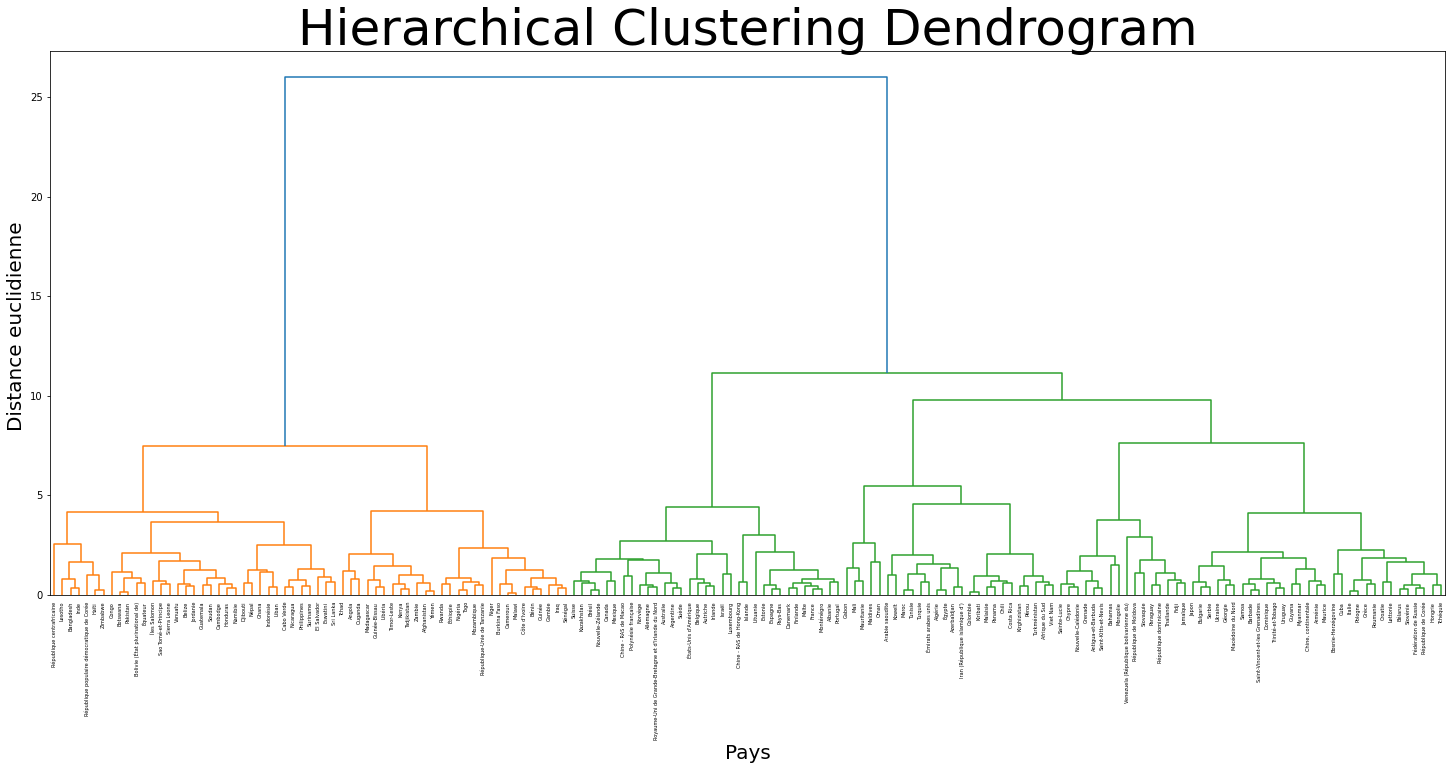

In [234]:
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster


# préparation des données pour le clustering
X = df.values
names = df.index


# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)


In [235]:
#Les données centrées réduites 
X_scaled

array([[-1.45321255e+00, -1.33291818e+00, -1.87785119e+00,
         1.15259361e+00],
       [-8.18286886e-02,  1.11193334e-01,  3.00103022e-01,
         1.36814327e-01],
       [ 7.97280342e-01,  1.89121347e+00,  1.18749885e+00,
        -1.18909378e+00],
       [-9.42637860e-01,  5.79593762e-01,  1.07794381e+00,
         6.99492112e-01],
       [ 1.11247612e+00,  1.13566535e+00,  1.53150168e+00,
        -6.22040111e-01],
       [-7.68316558e-01, -1.33193312e+00, -1.28625397e+00,
         1.85475916e+00],
       [ 1.47771330e+00,  1.46565481e-02, -9.35677841e-01,
        -2.81442247e-01],
       [-2.90519851e-02,  3.14610134e-01,  7.40514287e-01,
         6.65405689e-01],
       [ 1.32706246e+00,  1.06129263e+00,  8.34731622e-01,
        -2.52205581e-01],
       [ 1.89283781e-01,  7.99264205e-01,  4.84155491e-01,
        -8.60412444e-01],
       [ 1.45178815e+00,  1.32726132e+00,  9.94681982e-01,
         4.85086949e-02],
       [ 1.07934623e+00,  1.32873893e+00,  1.83168250e+00,
      

In [236]:
# matrice liaison
print(Z)

[[2.80000000e+01 9.00000000e+01 8.64012111e-02 2.00000000e+00]
 [2.00000000e+01 1.12000000e+02 1.10747349e-01 2.00000000e+00]
 [3.50000000e+01 7.90000000e+01 1.55734609e-01 2.00000000e+00]
 [0.00000000e+00 1.60000000e+02 1.85486243e-01 2.00000000e+00]
 [7.20000000e+01 1.17000000e+02 2.07772278e-01 2.00000000e+00]
 [6.20000000e+01 1.62000000e+02 2.27895371e-01 2.00000000e+00]
 [2.10000000e+01 1.08000000e+02 2.33634126e-01 2.00000000e+00]
 [9.40000000e+01 1.52000000e+02 2.39999698e-01 2.00000000e+00]
 [3.00000000e+00 1.63000000e+02 2.48163392e-01 2.00000000e+00]
 [1.50000000e+01 1.31000000e+02 2.57500348e-01 2.00000000e+00]
 [1.05000000e+02 1.50000000e+02 2.58206028e-01 2.00000000e+00]
 [5.00000000e+01 9.90000000e+01 2.82916890e-01 2.00000000e+00]
 [2.50000000e+01 5.80000000e+01 2.87713000e-01 2.00000000e+00]
 [7.70000000e+01 1.45000000e+02 2.99142238e-01 2.00000000e+00]
 [2.40000000e+01 1.38000000e+02 3.01890031e-01 2.00000000e+00]
 [4.50000000e+01 1.15000000e+02 3.04857277e-01 2.000000

In [237]:
#Couper dendogramme 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')
clusters

array([1, 3, 2, 3, 2, 1, 4, 3, 2, 5, 2, 2, 3, 4, 1, 5, 2, 1, 1, 5, 1, 2,
       5, 1, 5, 1, 1, 1, 1, 2, 3, 2, 2, 5, 4, 3, 1, 3, 5, 5, 1, 2, 1, 5,
       1, 2, 2, 1, 4, 2, 2, 5, 3, 1, 1, 4, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1,
       1, 3, 1, 2, 2, 2, 5, 4, 5, 1, 2, 1, 3, 3, 3, 1, 5, 1, 1, 2, 2, 5,
       1, 3, 1, 3, 3, 2, 3, 5, 3, 2, 4, 2, 1, 5, 1, 1, 1, 1, 2, 4, 2, 1,
       3, 1, 1, 3, 4, 2, 1, 5, 2, 2, 3, 5, 2, 1, 1, 5, 4, 4, 1, 1, 4, 5,
       4, 5, 1, 5, 1, 4, 5, 1, 1, 2, 1, 2, 1, 1, 1, 5, 4, 1, 1, 5, 3, 3,
       3, 5, 5, 1, 4, 3, 1, 1, 1, 3, 3, 1, 2, 1, 1], dtype=int32)

In [238]:
# Fonction silouette pour clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


def plot_silhouettes(X_scaled, clusters):
    # calcul du coefficient de silhouette total
    # et des coefficients de silhouette associés à chaque point de chaque cluster
    silhouette_avg = silhouette_score(X_scaled, clusters)
    sample_silhouette_values = silhouette_samples(X_scaled, clusters)
    n_cluster = max(clusters+1)

    # instanciation de la figure pour tracer les silhouette
    fig, ax = plt.subplots()

    ax.set_title(f"coefficients de silhouette pour {n_cluster-1} clusters")
    ax.set_xlabel("coefficient de silhouette")
    ax.set_ylabel("cluster")
    ax.set_ylim([0, len(X_scaled) + 10*n_cluster])
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="coefficient de silhouette moyen")

    y_lower = 10

    for i in range(1, n_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # on color les coefficients de silhouette
        color = cm.nipy_spectral(float(i+1) / n_cluster)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7,
        )

        # on annote le diagramme avec le numéro et la population du cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax.text(0.1, y_lower + 0.5 * size_cluster_i, str(size_cluster_i))

        y_lower = y_upper + 10

    ax.set_yticks([])
    ax.legend()
    
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.close()
    
    return fig

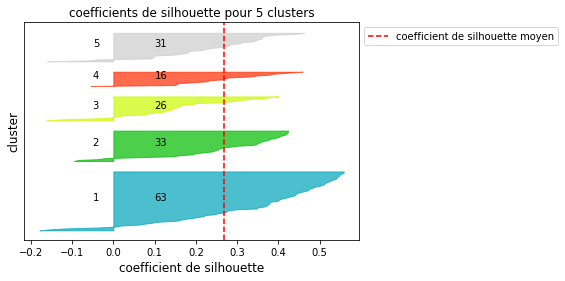

<Figure size 1440x720 with 0 Axes>

In [239]:
# Visualisation de la silouhette des clusters

plt.rc('axes', labelsize=12)

plt.figure(figsize=(20,10))
plot_silhouettes(X_scaled, clusters)


In [240]:
#La metrics pour la silhouette des clusters 
metrics.silhouette_score(X_scaled, clusters)

0.2686690193701992

In [241]:
#Création dataframe pour les clusters 
segmen3 = pd.DataFrame(clusters)
DF = df.reset_index()
DF1= pd.concat([DF, segmen3], axis=1)
DF1 = DF1.rename(columns={0:'cluster'})
DF1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,3
165,Équateur,0.455154,24009.70,943890.0,1.784233,1
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,2
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,1


In [242]:
# Création dataframe pour les données standardisées 
centre_reduit= pd.DataFrame(X_scaled, columns= df.columns)
# Concaténation entre df clusters et les données standardisées 
clus_centre_reduit = pd.concat([centre_reduit, segmen3], axis=1)
clus_centre_reduit = clus_centre_reduit.rename(columns={0:'cluster'})
clus_centre_reduit

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,-1.453213,-1.332918,-1.877851,1.152594,1
1,-0.081829,0.111193,0.300103,0.136814,3
2,0.797280,1.891213,1.187499,-1.189094,2
3,-0.942638,0.579594,1.077944,0.699492,3
4,1.112476,1.135665,1.531502,-0.622040,2
...,...,...,...,...,...
164,-0.119414,1.289829,1.115193,0.067525,3
165,0.173412,-0.757145,-0.593866,0.451351,1
166,1.388916,1.604558,1.991633,-0.555858,2
167,-2.115701,-0.763548,-1.213948,1.257065,1


In [243]:
# les centroïdes des groupes et leurs coordonnées dans chacune des dimensions
# Les 4 variables openclassrooms
centroide = clus_centre_reduit.groupby('cluster').mean()
centroide

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
cluster,,,,
1,-1.001007,-0.979271,-0.917523,0.754100
2,1.139820,1.360963,1.169505,-0.535168
3,-0.076963,0.318134,0.412692,0.580164
4,0.798728,-0.452605,-0.601124,-0.573927
5,0.473252,0.508144,0.583815,-1.153200


In [244]:

  
# Library of Functions for the OpenClassrooms Multivariate Exploratory Data Analysis Course

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 20 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 20 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.4)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)   

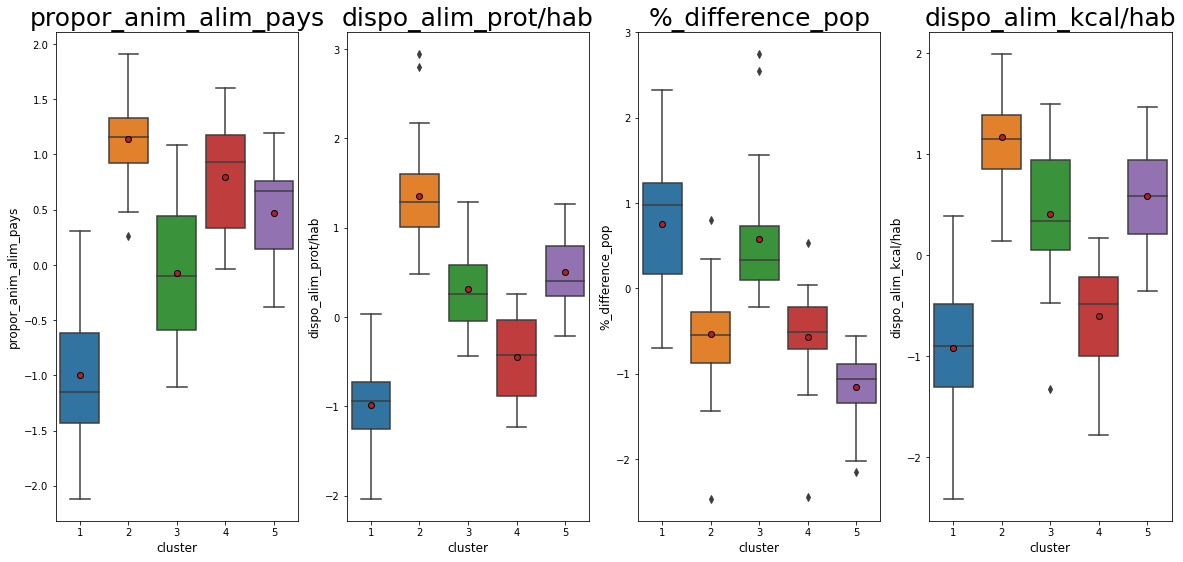

In [245]:
# Comparer chaque clusters pour chaque dimensions

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

_, axes = plt.subplots (1, 4 ,sharey = False, figsize = (20, 9)) 
sns.boxplot(x = 'cluster', y = 'propor_anim_alim_pays', 
            data = clus_centre_reduit, showmeans=True,meanprops=meanprops, ax = axes [0])
axes[0].set_title("propor_anim_alim_pays",size=25); 

plt.subplots_adjust(hspace=50)
sns.boxplot(x = 'cluster', y = 'dispo_alim_prot/hab', 
               data =  clus_centre_reduit, showmeans=True,meanprops=meanprops, ax = axes [1])
axes[1].set_title("dispo_alim_prot/hab",size=25);
plt.subplots_adjust(hspace=50)

sns.boxplot(x = 'cluster', y = '%_difference_pop', 
               data = clus_centre_reduit ,showmeans=True,meanprops=meanprops, ax = axes [2])
axes[2].set_title("%_difference_pop",size=25);
plt.subplots_adjust(hspace=50)


sns.boxplot(x = 'cluster', y = 'dispo_alim_kcal/hab', 
               data = clus_centre_reduit ,showmeans=True,meanprops=meanprops, ax = axes [3])
axes[3].set_title("dispo_alim_kcal/hab", size=25);

#fig.tight_layout()


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

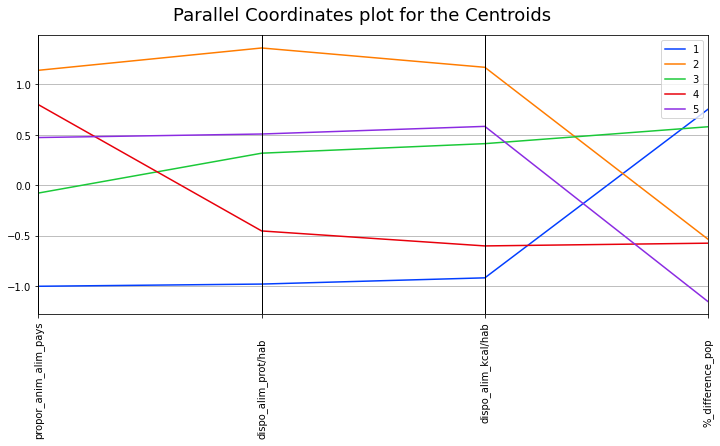

In [246]:
# les centroïdes des groupes et leurs coordonnées dans chacune des dimensions
display_parallel_coordinates_centroids(centroide.reset_index(), 5)
plt.xticks(rotation=90)

# 3- Caractériser la segmentation avec des variables complémentaires

In [247]:
# Dataframe avec les 4 variables Openclassrooms
DF1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,3
165,Équateur,0.455154,24009.70,943890.0,1.784233,1
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,2
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,1


In [248]:
#Dataframe nouvelle variables
new_variable = DATA_FINAL1.iloc[:,[0,5,6,7,8,9,10]] 
new_variable

,Zone,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT,Stabilité
0,Afghanistan,605.557362,5.0,0.54,29.0,55.0,-2.80
1,Afrique du Sud,6153.459018,143.0,14.11,514.0,2035.0,-0.28
2,Albanie,4445.132198,85.0,6.26,38.0,47.0,0.38
3,Algérie,4051.244377,22.0,1.97,2.0,264.0,-0.92
4,Allemagne,44642.742052,71.0,7.96,842.0,1609.0,0.59
...,...,...,...,...,...,...,...
162,Émirats arabes unis,40180.344045,147.0,14.80,433.0,412.0,0.62
163,Équateur,6273.488892,83.0,6.15,0.0,324.0,-0.07
164,États-Unis d'Amérique,60159.823417,219.0,19.93,123.0,18100.0,0.34
165,Éthiopie,731.580209,0.0,0.04,1.0,14.0,-1.68


In [249]:
#Merge entre df openclassrooms et df avec nouvelles variables
New_df = new_variable.merge(DF1, on='Zone', how='left')
# Grouper les clusters avec aggrégation mean pour les centroides pour chaque dimensions 
mean_Newdf = New_df.groupby('cluster').mean()
# Standardisé les données 
std_scale = preprocessing.StandardScaler().fit(mean_Newdf)
X_scaled_ALL = std_scale.transform(mean_Newdf)
X_scaled_ALL

array([[-0.9562707 , -1.80508688, -1.83272699, -0.9175623 , -0.97956555,
        -1.47684928, -1.69329766, -1.37715963, -1.33106557,  1.28575158],
       [ 1.93425046,  0.7875538 ,  0.99418311,  1.62804904,  1.52432912,
         1.26975385,  1.16273611,  1.50398049,  1.35905574, -0.46530813],
       [-0.4488155 , -0.26044235, -0.19952787,  0.28113032, -0.15471819,
        -0.81448371, -0.45486938,  0.20881732,  0.35768201,  1.04897517],
       [-0.30185653,  0.98321114,  0.71152466, -1.18022408, -1.09415189,
         0.61434071,  0.70288751, -0.77672913, -0.96060038, -0.55879754],
       [-0.22730774,  0.2947643 ,  0.32654709,  0.18860701,  0.70410651,
         0.40723843,  0.28254341,  0.44109095,  0.57492821, -1.31062109]])

In [250]:
#Création colonne cluster pour le concatener 
colonne_Mean_newdf= mean_Newdf.reset_index()[['cluster']]
colonne_Mean_newdf

,cluster
0,1
1,2
2,3
3,4
4,5


In [312]:
#Création df avec centroides standardisés 
centre_reduit_ALL= pd.DataFrame(X_scaled_ALL, columns= mean_Newdf.columns)
centre_reduit_ALL
#Concaténation entre les centroides standardisés pour chaque dimensions avec colonne cluster
centroide_newdf= pd.concat([centre_reduit_ALL, colonne_Mean_newdf], axis=1)
# Création dataframe pour livrable
centroide_newdf.to_csv('P5_04_centroides1.csv', index=False)
centroide_newdf

,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT,Stabilité,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,-0.956271,-1.805087,-1.832727,-0.917562,-0.979566,-1.476849,-1.693298,-1.377160,-1.331066,1.285752,1
1,1.934250,0.787554,0.994183,1.628049,1.524329,1.269754,1.162736,1.503980,1.359056,-0.465308,2
2,-0.448815,-0.260442,-0.199528,0.281130,-0.154718,-0.814484,-0.454869,0.208817,0.357682,1.048975,3
3,-0.301857,0.983211,0.711525,-1.180224,-1.094152,0.614341,0.702888,-0.776729,-0.960600,-0.558798,4
4,-0.227308,0.294764,0.326547,0.188607,0.704107,0.407238,0.282543,0.441091,0.574928,-1.310621,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

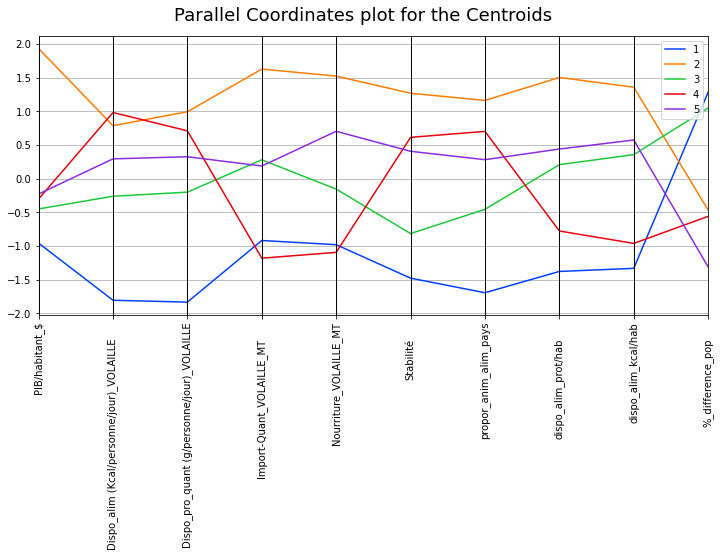

In [252]:
# Visualisation des centroides pour chaque dimensions 
display_parallel_coordinates_centroids(centroide_newdf, 5)
plt.xticks(rotation=90)

# 4- Choix de la liste de pays par rapport à une methode de scoring

In [253]:
New_df

,Zone,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT,Stabilité,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,Afghanistan,605.557362,5.0,0.54,29.0,55.0,-2.80,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,6153.459018,143.0,14.11,514.0,2035.0,-0.28,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,4445.132198,85.0,6.26,38.0,47.0,0.38,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,4051.244377,22.0,1.97,2.0,264.0,-0.92,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,44642.742052,71.0,7.96,842.0,1609.0,0.59,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Émirats arabes unis,40180.344045,147.0,14.80,433.0,412.0,0.62,0.408329,39179.10,1228590.0,1.348363,3
163,Équateur,6273.488892,83.0,6.15,0.0,324.0,-0.07,0.455154,24009.70,943890.0,1.784233,1
164,États-Unis d'Amérique,60159.823417,219.0,19.93,123.0,18100.0,0.34,0.649521,41511.45,1374590.0,0.640454,2
165,Éthiopie,731.580209,0.0,0.04,1.0,14.0,-1.68,0.089109,23962.25,840595.0,2.699196,1


In [254]:
#Les pays du clusters 2 avec les variables qui vont déterminer la sélection pour la liste
target_pays= New_df[New_df['cluster']==2]
target_pays1= target_pays.iloc[:,[0,1,2,4,6,7]]
target_pays1

,Zone,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Stabilité,propor_anim_alim_pays
2,Albanie,4445.132198,85.0,38.0,0.38,0.554914
4,Allemagne,44642.742052,71.0,842.0,0.59,0.605316
8,Argentine,14517.291248,182.0,8.0,0.17,0.639630
10,Australie,57917.093685,192.0,16.0,0.89,0.659574
11,Autriche,47887.174380,65.0,110.0,1.05,0.600018
16,Belgique,44118.925664,44.0,338.0,0.43,0.569867
21,Brésil,9812.310980,204.0,3.0,-0.42,0.581114
29,Canada,45057.287226,154.0,182.0,1.10,0.503656
31,Chine - RAS de Hong-Kong,46393.801455,210.0,907.0,0.83,0.733053
32,Chine - RAS de Macao,81211.219912,142.0,23.0,1.43,0.667728


In [255]:
#Création colonne scoring pour la variable importation vollaile
score_imp_volaille = target_pays1.sort_values(by=['Import-Quant_VOLAILLE_MT'], ascending=False)[['Zone','Import-Quant_VOLAILLE_MT']]
score_imp_volaille['scoring_import_vollaile_5']=score_imp_volaille['Import-Quant_VOLAILLE_MT']/score_imp_volaille['Import-Quant_VOLAILLE_MT'].max()
#la colonne importation/max = score entre 0et 1
#somme(coefficient*variable)/somme(coeffient) = score 0et 1 et choisir le max faire trie 
#score_imp_volaille['scoring2']= score_imp_volaille['scoring']+(5*)
score_imp_volaille1=score_imp_volaille[['Zone','scoring_import_vollaile_5' ]]
score_imp_volaille1

,Zone,scoring_import_vollaile_5
97,Mexique,1.000000
31,Chine - RAS de Hong-Kong,0.933128
4,Allemagne,0.866255
120,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.801440
114,Pays-Bas,0.625514
50,France,0.520576
16,Belgique,0.347737
45,Espagne,0.210905
29,Canada,0.187243
76,Kazakhstan,0.179012


In [256]:
#Création colonne scoring pour la variable PIB/hab
scoring_PIB_hab = target_pays1.sort_values(by=['PIB/habitant_$'], ascending=False)[['Zone','PIB/habitant_$']]
scoring_PIB_hab['scoring_PIB/hab_3']= scoring_PIB_hab['PIB/habitant_$']/scoring_PIB_hab['PIB/habitant_$'].max()
scoring_PIB_hab1=scoring_PIB_hab[['Zone','scoring_PIB/hab_3' ]]
scoring_PIB_hab1

,Zone,scoring_PIB/hab_3
86,Luxembourg,1.000000
32,Chine - RAS de Macao,0.738262
139,Suisse,0.729257
106,Norvège,0.682638
70,Islande,0.664599
69,Irlande,0.640826
164,États-Unis d'Amérique,0.546891
10,Australie,0.526503
41,Danemark,0.522296
141,Suède,0.495818


In [257]:
#Création colonne scoring pour la variable stabilité
scoring_stabilité= target_pays1.sort_values(by=['Stabilité'], ascending=False)[['Zone','Stabilité']]
scoring_stabilité['scoring_stabilité_2']= scoring_stabilité['Stabilité']/scoring_stabilité['Stabilité'].max()
scoring_stabilité1=scoring_stabilité[['Zone', 'scoring_stabilité_2']]
scoring_stabilité1


,Zone,scoring_stabilité_2
107,Nouvelle-Zélande,1.000000
32,Chine - RAS de Macao,0.899371
70,Islande,0.849057
86,Luxembourg,0.836478
139,Suisse,0.792453
93,Malte,0.786164
106,Norvège,0.735849
117,Portugal,0.704403
29,Canada,0.691824
49,Finlande,0.679245


In [258]:
#Création colonne scoring pour la variable Dispo_alim (Kcal/personne/jour)_VOLAILLE
scoring_dispo_kcal = target_pays1.sort_values(by=['Dispo_alim (Kcal/personne/jour)_VOLAILLE'], ascending=False)[['Zone','Dispo_alim (Kcal/personne/jour)_VOLAILLE']]
scoring_dispo_kcal['scoring_dispo_kcal_4']= scoring_dispo_kcal['Dispo_alim (Kcal/personne/jour)_VOLAILLE']/scoring_dispo_kcal['Dispo_alim (Kcal/personne/jour)_VOLAILLE'].max()
scoring_dispo_kcal1 = scoring_dispo_kcal[['Zone', 'scoring_dispo_kcal_4']]
scoring_dispo_kcal1



,Zone,scoring_dispo_kcal_4
71,Israël,1.000000
164,États-Unis d'Amérique,0.935897
31,Chine - RAS de Hong-Kong,0.897436
21,Brésil,0.871795
10,Australie,0.820513
8,Argentine,0.777778
29,Canada,0.658120
32,Chine - RAS de Macao,0.606838
107,Nouvelle-Zélande,0.598291
97,Mexique,0.525641


In [259]:
#Création de la colonne scoring_final par rapport aux variables avec leurs coefficient
dfscore=score_imp_volaille1.merge(scoring_dispo_kcal1, on='Zone', how='left')
dfscore1= dfscore.merge(scoring_PIB_hab1,on='Zone', how='left')
dfscore2=dfscore1.merge(scoring_stabilité1,on='Zone', how='left')
dfscore2['scoring_final']=(dfscore2['scoring_import_vollaile_5']*5+dfscore2['scoring_dispo_kcal_4']*4+dfscore2['scoring_PIB/hab_3']*3+dfscore2['scoring_stabilité_2']*2)/14
#somme(coefficient*variable)/somme(coeffient)
dfscore2

,Zone,scoring_import_vollaile_5,scoring_dispo_kcal_4,scoring_PIB/hab_3,scoring_stabilité_2,scoring_final
0,Mexique,1.000000,0.525641,0.081517,-0.452830,0.460104
1,Chine - RAS de Hong-Kong,0.933128,0.897436,0.421749,0.522013,0.754618
2,Allemagne,0.866255,0.303419,0.405831,0.371069,0.536042
3,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.801440,0.512821,0.366231,0.207547,0.540876
4,Pays-Bas,0.625514,0.299145,0.444966,0.578616,0.486877
5,France,0.520576,0.393162,0.350595,0.176101,0.398537
6,Belgique,0.347737,0.188034,0.401069,0.270440,0.302493
7,Espagne,0.210905,0.448718,0.257407,0.176101,0.283844
8,Canada,0.187243,0.658120,0.409600,0.691824,0.441510
9,Kazakhstan,0.179012,0.260684,0.083297,0.025157,0.159857


In [310]:
#LA LISTE DES 10 PAYS CIBLE POUR EXPORTATION DE LA PRODUCTION DE POULET
V = dfscore2[['Zone','scoring_final']].sort_values(by='scoring_final',ascending=False).head(10)
V

,Zone,scoring_final
1,Chine - RAS de Hong-Kong,0.754618
3,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.540876
2,Allemagne,0.536042
4,Pays-Bas,0.486877
19,Chine - RAS de Macao,0.468514
11,États-Unis d'Amérique,0.460332
0,Mexique,0.460104
8,Canada,0.441510
22,Australie,0.433097
23,Luxembourg,0.422073


In [261]:
#dataframe original 
df = df.reset_index()
# dataframe des clusters 
segmen3.head()
# concaténation entre df original et df des clusters 
df1 = pd.concat([df, segmen3], axis=1).rename(columns={0:'clusters'})
df1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,clusters
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,3
165,Équateur,0.455154,24009.70,943890.0,1.784233,1
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,2
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,1


In [262]:
# éffacer zone et mettre clusters sur l'index
df2 = df1.drop('Zone',axis=1)
df3 = df2.set_index('clusters')
df3

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
clusters,,,,
1,0.195045,19742.85,730000.0,2.580559
3,0.414339,30444.65,1092810.0,1.427048
2,0.554914,43635.75,1240635.0,-0.078644
3,0.276690,33915.80,1222385.0,2.066020
2,0.605316,38036.65,1297940.0,0.565298
...,...,...,...,...
3,0.408329,39179.10,1228590.0,1.348363
1,0.455154,24009.70,943890.0,1.784233
2,0.649521,41511.45,1374590.0,0.640454


In [263]:
# Les pays classés par cluster 
print
print('---------------------------------------------')
print('Les pays du cluster 1')
clusters1 = df1[df1['clusters']==1]['Zone'].unique()
print(clusters1)
print('---------------------------------------------')
print('Les pays du cluster 2')
clusters2 = df1[df1['clusters']==2]['Zone'].unique()
print(clusters2)
  
print('---------------------------------------------')
print('Les pays du cluster 3')
clusters3 = df1[df1['clusters']==3]['Zone'].unique()
print(clusters3)
    
print('---------------------------------------------')
print('Les pays du cluster 4')
clusters4 = df1[df1['clusters']==4]['Zone'].unique()
print(clusters4)
    
print('---------------------------------------------')
print('Les pays du clusters 5')
clusters5 = df1[df1['clusters']==5]['Zone'].unique()
print(clusters5)

---------------------------------------------
Les pays du cluster 1
['Afghanistan' 'Angola' 'Bangladesh' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Burkina Faso' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Congo' "Côte d'Ivoire" 'Djibouti'
 'El Salvador' 'Eswatini' 'Gambie' 'Ghana' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Haïti' 'Honduras' 'Inde' 'Indonésie' 'Iraq' 'Jordanie'
 'Kenya' 'Lesotho' 'Liban' 'Libéria' 'Madagascar' 'Malawi' 'Mozambique'
 'Namibie' 'Nicaragua' 'Niger' 'Nigéria' 'Népal' 'Ouganda' 'Pakistan'
 'Philippines' 'Rwanda' 'République centrafricaine'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Sao Tomé-et-Principe' 'Sierra Leone'
 'Soudan' 'Sri Lanka' 'Suriname' 'Sénégal' 'Tadjikistan' 'Tchad'
 'Timor-Leste' 'Togo' 'Vanuatu' 'Yémen' 'Zambie' 'Zimbabwe' 'Équateur'
 'Éthiopie' 'Îles Salomon']
---------------------------------------------
Les pays du cluster 2
['Albanie' 'Allemagne' 'Argentine' 'Australie' 'Autriche' 'Belgique'

In [264]:
# création dataframe pour livrable
livrable = df1[['Zone', 'clusters']].sort_values(by='clusters', ascending=True)
livrable.to_csv('P5_03_listepays.csv', index=False)


# 5- ACP

In [265]:
df1

,Zone,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,clusters
0,Afghanistan,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...
164,Émirats arabes unis,0.408329,39179.10,1228590.0,1.348363,3
165,Équateur,0.455154,24009.70,943890.0,1.784233,1
166,États-Unis d'Amérique,0.649521,41511.45,1374590.0,0.640454,2
167,Éthiopie,0.089109,23962.25,840595.0,2.699196,1


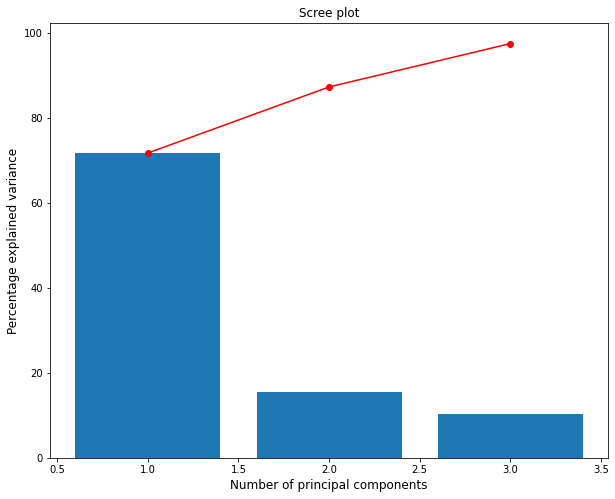

<Figure size 1080x864 with 0 Axes>

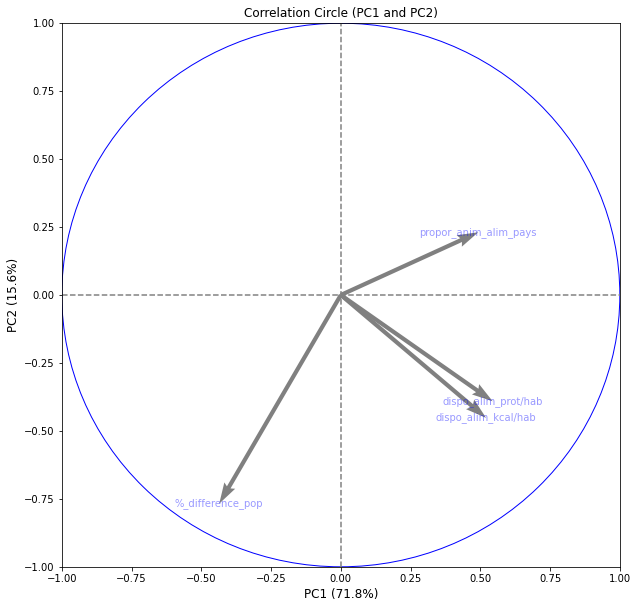

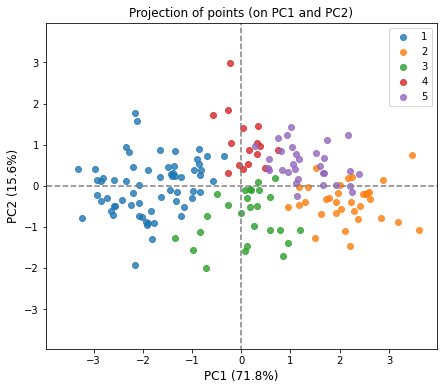

In [266]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df2[["propor_anim_alim_pays", "dispo_alim_prot/hab","dispo_alim_kcal/hab","%_difference_pop" ]]
X = data_pca.values
names = df2.index
features = df2.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=0.95)
df_composantes= pca.fit_transform(X_scaled)

# Eboulis des valeurs propres
plt.figure(figsize=(10,8))
display_scree_plot(pca)


# Cercle des corrélations
plt.figure(figsize=(15,12))
pcs = pca.components_
display_circles(pcs,3, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



display_factorial_planes(df_composantes, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)


#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, 4, pca, [(0,1),(2,3),(4,5)], labels = np.array(names),cmap='coolwarm')

#plt.show()

In [267]:
# le nombre de composantes à conserver 
pca.n_components_

3

In [268]:
# les dimensions des données standardisées et les dimensions après la reduction
print(X_scaled.shape)
print(df_composantes.shape)

(169, 4)
(169, 3)


In [269]:
# Fonction biplot pour mettre les individus et variables sur le meme plan factorielle
def biplot(x=None,y=None,score=None,coeff=None,coeff_labels=True,score_labels=None ,circle='T',bigdata=1000,cat=True,cmap="Set1",density=True):
    if score is not None : x = score
    if x.shape[1]>1 :
        xs = x[:,0]
        ys = x[:,1]
    else :
        xs = x
        ys = y
    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #x_c = xs * scalex
    #y_c = ys * scaley
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")
    if cat is None : cat = [0]*len(xs)
    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)
    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(6,6),facecolor='w') 
    ax = fig.add_subplot(111)
    # Affichage des points
    if (len(xs) < bigdata) :   
        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)
        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")
    # Affichage des nappes convexes (BigData)
    else :
        #color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density==True :
            sns.set_style("white")
            sns.kdeplot(x_c,y_c)
            sns.kdeplot(x_c,y_c, cmap="Blues", shade=True, shade_lowest=True, )
        #print(x_c)
        #print(y_c)
        for cat_temp in cat.cat.codes.unique() :
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [ [ None ] * len(x_c_temp) ] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp),2)
            points[:,0] = x_c_temp
            points[:,1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)
                if (temp == 0) :
                     plt.xlim(-1,1)
                     plt.ylim(-1,1)
                     temp = temp+1
    if coeff is not None :
        if (circle == 'T') :
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle,y_circle)
            F = X**2 + Y**2 - 1.0
            #fig, ax = plt.subplots()
            plt.contour(X,Y,F,[0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
        if score_labels is not None :
            for i in range(len(score_labels)) :
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x,temp_y,list(score_labels)[i])
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


<Figure size 720x1008 with 0 Axes>

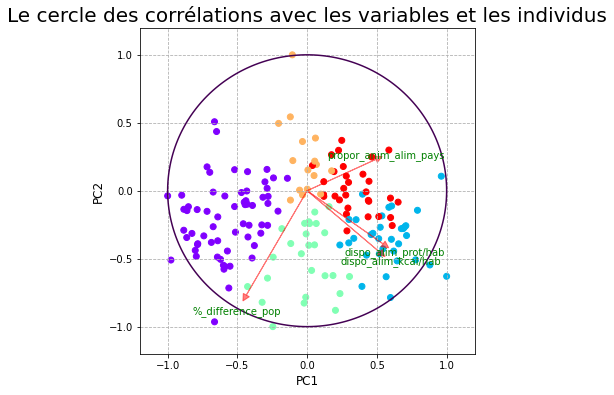

In [270]:
#Le cercle des corrélations avec les variables et les individus
plt.figure(figsize=(10,14))
biplot(score=df_composantes[:,0:2],
    coeff=np.transpose(pca.components_[0:2, :]), cat=df2['clusters'],coeff_labels=df2.columns,
    cmap='rainbow')

plt.title('Le cercle des corrélations avec les variables et les individus', size=20)
plt.show()


In [271]:
#Visualiser les pays sur le 1 er plan factoriel

import plotly.express as px
from sklearn.decomposition import PCA

features = ['propor_anim_alim_pays','dispo_alim_prot/hab','dispo_alim_kcal/hab','%_difference_pop']
X = df1[features]


std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df1['Zone'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [272]:
# drop clusters pour avoir que les noms des vecteurs 
# dataframe avec colonnes et valeurs propres
A = df2.drop('clusters',axis=1)
A.head()
df_comp = pd.DataFrame(pca.components_, columns=A.columns)
df_comp

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
0,0.492639,0.544292,0.520683,-0.435822
1,0.230785,-0.391052,-0.452156,-0.767705


Text(0.5, 1.0, 'Les corrélations sur les axes des plans factorielles ')

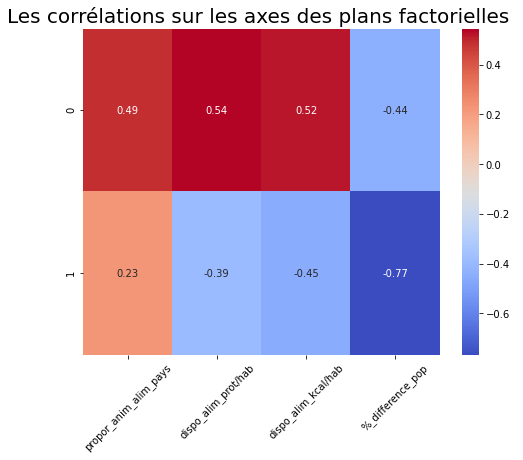

In [273]:
# voir corrélation des valeurs propre  avec les axes du plan factorielle 
df_comp = pd.DataFrame(pca.components_, columns=A.columns)
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.heatmap(df_comp,annot=True,cmap='coolwarm',) 
plt.title('Les corrélations sur les axes des plans factorielles ', size=20)

In [274]:
#Matrice corrélation
corr_matri = df2.iloc[:,[0,1,2,3]].corr()
corr_matri


,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop
propor_anim_alim_pays,1.000000,0.695502,0.564010,-0.572876
dispo_alim_prot/hab,0.695502,1.000000,0.878825,-0.500982
dispo_alim_kcal/hab,0.564010,0.878825,1.000000,-0.500635
%_difference_pop,-0.572876,-0.500982,-0.500635,1.000000


Text(0.5, 1.0, 'La matrice de corrélation')

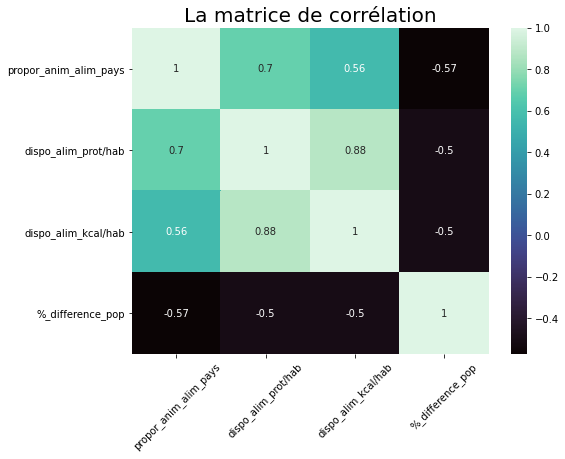

In [275]:
# Visualisation heatmap des corrélation’
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.heatmap(corr_matri, annot=True, cmap='mako')
plt.title('La matrice de corrélation', size=20)


In [276]:
# Matrice covariance
df2.cov()

,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,clusters
propor_anim_alim_pays,0.025722,8.290836e+02,1.511339e+04,-0.104647,0.124341
dispo_alim_prot/hab,829.083645,5.524457e+07,1.091356e+09,-4241.099201,4531.945391
dispo_alim_kcal/hab,15113.388694,1.091356e+09,2.791505e+10,-95269.096082,102718.985982
%_difference_pop,-0.104647,-4.241099e+03,-9.526910e+04,1.297246,-1.068250
clusters,0.124341,4.531945e+03,1.027190e+05,-1.068250,2.298676


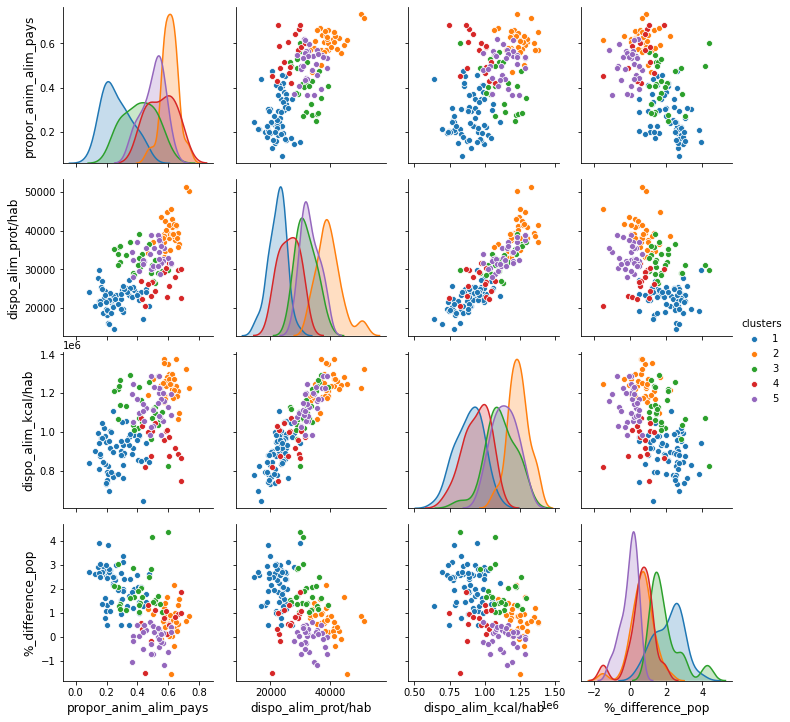

In [277]:
# voir les relations
sns.pairplot(df2, hue='clusters')

### Contribution des individus et qualité de représentation des individus - COS2

In [278]:
contri_ind= df1.set_index('Zone')
clus_contri =df1[['clusters']]

In [279]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
di
contribution_ind =pd.DataFrame({'Zone':contri_ind.index,'d_i':di})
contribution_ind = pd.concat([contribution_ind,clus_contri], axis=1)
contribution_ind[['Zone', 'd_i']].sort_values(by='d_i',ascending=False)

,Zone,d_i
70,Islande,15.081659
85,Lituanie,13.676416
31,Chine - RAS de Hong-Kong,12.805470
111,Ouganda,11.396228
88,Madagascar,11.306865
...,...,...
78,Kirghizistan,0.384704
114,Paraguay,0.331140
120,Pérou,0.283661
159,Viet Nam,0.283150


In [280]:
#qualité de représentation des individus - COS2
cos2 = df_composantes**2
for j in range(pca.n_components_):
 cos2[:,j] = cos2[:,j]/di
qualité_ind = pd.DataFrame({'Zone':contri_ind.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
qualité_ind = pd.concat([qualité_ind,clus_contri], axis=1)
qualité_ind[qualité_ind['clusters']==2]

,Zone,COS2_1,COS2_2,clusters
2,Albanie,0.930426,0.004585,2
4,Allemagne,0.949458,0.030770,2
8,Argentine,0.864639,0.023464,2
10,Australie,0.769771,0.092613,2
11,Autriche,0.878659,0.099452,2
16,Belgique,0.852543,0.062186,2
21,Brésil,0.897342,0.000844,2
29,Canada,0.813136,0.149994,2
31,Chine - RAS de Hong-Kong,0.794992,0.059790,2
32,Chine - RAS de Macao,0.506203,0.044233,2


In [281]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[0.98295394 0.83848795 1.06096055 1.45576278 0.98149418 1.44663453
 2.32647821 0.93059374 1.29570659 1.0103964  1.5309585  0.97813159
 0.95367318 3.90882693 1.73197453 1.01066959 1.01141626 0.933122
 1.1370584  3.03218257 1.24412747 0.96865316 1.10939673 1.31642792
 1.0375721  1.0611788  0.98522315 1.02485852 1.27849181 1.03235633
 0.87955878 1.77161869 2.03630862 1.22591285 1.08318719 0.18775903
 2.17050806 0.78888505 1.00724976 1.99607128 1.04356955 1.07390659
 1.52872021 0.94265566 0.95357556 1.00637466 0.97858761 1.10473591
 0.69136011 0.99434009 0.99981604 1.04701848 1.68704155 1.01097373
 1.13306701 1.63151871 1.22993054 0.99127513 1.21123835 0.99231955
 0.85318228 1.35072836 1.26390109 0.9909968  0.99686728 1.41940501
 0.77671969 1.11870148 1.03220402 0.96174773 1.25992429 1.15561958
 1.21780514 0.94672302 0.97325703 0.98899039 1.11950654 0.99197128
 0.81836002 0.14961253 1.02939496 1.59453121 1.23184476 0.92569949
 1.01833317 1.35814791 1.83678514 1.09280003 1.07939485 0.563496

In [282]:
H =qualité_ind[['Zone']]

In [283]:
#Création df pour les 3 composantes de ACP
principalDf = pd.DataFrame (data = df_composantes 
             , columns = ['composant principal 1', 'composant principal 2','composant principal 3'
                      ])
principalDf
#dataframe avec les 3 composantes de ACP et la colonne clusters

final_df = pd.concat([principalDf, segmen3], axis=1)
final_df = final_df.rename(columns={0: 'clusters'})
V = pd.concat([H,final_df], axis=1)
V[['Zone','composant principal 1', 'clusters']].sort_values(by='composant principal 1', ascending=False).head(20)


,Zone,composant principal 1,clusters
70,Islande,3.607417,2
85,Lituanie,3.474600,2
31,Chine - RAS de Hong-Kong,3.190649,2
119,Portugal,2.882612,2
166,États-Unis d'Amérique,2.836849,2
50,France,2.611690,2
99,Monténégro,2.593917,2
2,Albanie,2.558689,2
49,Finlande,2.528988,2
41,Danemark,2.482531,2


In [284]:
V1= V[['Zone','composant principal 2']].sort_values(by='composant principal 2', ascending=False)
V1

,Zone,composant principal 2
158,Venezuela (République bolivarienne du),2.993510
126,République de Moldova,1.851314
124,République centrafricaine,1.761779
13,Bahamas,1.731435
128,République populaire démocratique de Corée,1.581451
...,...,...
92,Mali,-1.562023
163,Égypte,-1.576752
80,Koweït,-1.709904
104,Niger,-1.921686


# 6- Vérification que les clusters soit différents

## Tester la normalité des variables

In [285]:
New_df

,Zone,PIB/habitant_$,Dispo_alim (Kcal/personne/jour)_VOLAILLE,Dispo_pro_quant (g/personne/jour)_VOLAILLE,Import-Quant_VOLAILLE_MT,Nourriture_VOLAILLE_MT,Stabilité,propor_anim_alim_pays,dispo_alim_prot/hab,dispo_alim_kcal/hab,%_difference_pop,cluster
0,Afghanistan,605.557362,5.0,0.54,29.0,55.0,-2.80,0.195045,19742.85,730000.0,2.580559,1
1,Afrique du Sud,6153.459018,143.0,14.11,514.0,2035.0,-0.28,0.414339,30444.65,1092810.0,1.427048,3
2,Albanie,4445.132198,85.0,6.26,38.0,47.0,0.38,0.554914,43635.75,1240635.0,-0.078644,2
3,Algérie,4051.244377,22.0,1.97,2.0,264.0,-0.92,0.276690,33915.80,1222385.0,2.066020,3
4,Allemagne,44642.742052,71.0,7.96,842.0,1609.0,0.59,0.605316,38036.65,1297940.0,0.565298,2
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Émirats arabes unis,40180.344045,147.0,14.80,433.0,412.0,0.62,0.408329,39179.10,1228590.0,1.348363,3
163,Équateur,6273.488892,83.0,6.15,0.0,324.0,-0.07,0.455154,24009.70,943890.0,1.784233,1
164,États-Unis d'Amérique,60159.823417,219.0,19.93,123.0,18100.0,0.34,0.649521,41511.45,1374590.0,0.640454,2
165,Éthiopie,731.580209,0.0,0.04,1.0,14.0,-1.68,0.089109,23962.25,840595.0,2.699196,1


In [286]:
#df pour les tests variance et comparaison
DF1_TEST= DF1.drop('Zone', axis=1)
#df pour tester les variables pour la normalité
DF1_normal= New_df.drop('Zone', axis=1)

In [287]:
# Boucle for pour voir les variables Gausienne
# Teste si un échantillon de données a une distribution gaussienne pour %_difference_pop
#H0: l'échantillon a une distribution gaussienne.
#H1: l'échantillon n'a pas de distribution gaussienne.


for i in range(len(DF1_normal.columns)):
    from scipy.stats import shapiro
    import scipy.stats
    data = DF1_normal.iloc[:,i]
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("la distribution price est probalemement gaussien")
    else:
        print("la distribution price n'est probalemement pas gaussien")

stat=0.694, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.908, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.922, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.516, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.292, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.966, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.957, p=0.000
la distribution price n'est probalemement pas gaussien
stat=0.977, p=0.006
la distribution price n'est probalemement pas gaussien
stat=0.979, p=0.011
la distribution price n'est probalemement pas gaussien
stat=0.989, p=0.199
la distribution price est probalemement gaussien
stat=0.822, p=0.000
la distribution price n'est probalemement pas gaussien


Text(0.5, 1.0, 'La distribution de la variable %_difference_pop ')

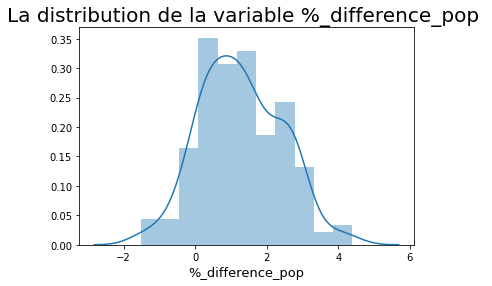

In [288]:
# Voir si la variable a une distribution normale
plt.rc('axes', labelsize=13) 
sns.distplot(DF1_TEST['%_difference_pop'])
plt.title('La distribution de la variable %_difference_pop ', size=20)
 

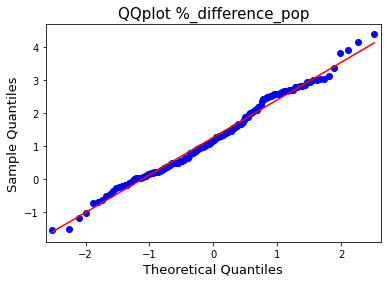

In [289]:
# QQplot 
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


data = DF1_TEST['%_difference_pop'].values

qqplot(data, line='s')

plt.title('QQplot %_difference_pop', size=15)
pyplot.show()

In [290]:
# tester la normalité

#H0: l'échantillon a une distribution gaussienne.
#H1: l'échantillon n'a pas de distribution gaussienne.

from scipy.stats import anderson
data = DF1_TEST['%_difference_pop'].values
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else: 
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.759
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [291]:
# Example of the D'Agostino's K^2 Normality Test

#H0: l'échantillon a une distribution gaussienne.
#H1: l'échantillon n'a pas de distribution gaussienne.
from scipy.stats import normaltest
data =DF1_TEST["%_difference_pop"].values
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement Gaussien ')
else:
	print('Probablement pas  Gaussien ')


stat=1.324, p=0.516
Probablement Gaussien 


## Test variance (Levene)

In [292]:
#H0: les variances des échantillons sont égales.
#H1: une ou plusieurs des variances des échantillons sont inégales.

#la variance de du cluster 1 et 5 n'ont pas de variance égale

from scipy.stats import levene

for i in range(1,6):
    for j in range(i+1,6):
        test_clusj = DF1_TEST[DF1_TEST['cluster']==j][['%_difference_pop']]
        test_clusi = DF1_TEST[DF1_TEST['cluster']==i][['%_difference_pop']]

        a = test_clusi['%_difference_pop'].values
        b = test_clusj['%_difference_pop'].values
        stat, p = levene(a, b )
        print(i,j)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('variance égale')
        else:
            print('variance pas égale ')
        

1 2
stat=3.219, p=0.076
variance égale
1 3
stat=0.164, p=0.686
variance égale
1 4
stat=1.230, p=0.271
variance égale
1 5
stat=9.832, p=0.002
variance pas égale 
2 3
stat=0.811, p=0.372
variance égale
2 4
stat=0.042, p=0.839
variance égale
2 5
stat=1.503, p=0.225
variance égale
3 4
stat=0.269, p=0.607
variance égale
3 5
stat=3.442, p=0.069
variance égale
4 5
stat=1.522, p=0.224
variance égale


In [293]:
#Séléction du cluster 1 pour test de la variance 
test_clus1 = DF1_TEST[DF1_TEST['cluster']==1][['%_difference_pop']]
test_clus1.head()

,%_difference_pop
0,2.580559
5,3.377933
14,1.081340
17,2.000543
18,1.459779


In [294]:
#Séléction du cluster 2 pour test de la variance 
test_clus2 = DF1_TEST[DF1_TEST['cluster']==2][['%_difference_pop']]
test_clus2.head()

,%_difference_pop
2,-0.078644
4,0.565298
8,0.985280
10,1.326769
11,0.829970


In [295]:
#Test des égalités des variances 
# levene plus robuste que bartlett

#H0: les variances des échantillons sont égales.
#H1: une ou plusieurs des variances des échantillons sont inégales.

from scipy.stats import levene
a = test_clus1['%_difference_pop'].values
b = test_clus2['%_difference_pop'].values
stat, p = levene(a, b)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('variance égale')
else:
	print('variance pas égale ')

stat=3.219, p=0.076
variance égale


In [296]:
#Test des égalités des variances 
#H0: les variances des échantillons sont égales.
#H1: une ou plusieurs des variances des échantillons sont inégales.

from scipy.stats import bartlett
a =  test_clus1['%_difference_pop'].values
b = test_clus2['%_difference_pop'].values
stat, p = bartlett(a, b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('variance égale')
else:
	print('variance pas égale ')


stat=1.319, p=0.251
variance égale


## test comparaison 2 moyennes paramétrique (ttest_ind)

In [297]:
#Hypothèses

#Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique (iid).
#Les observations de chaque échantillon sont normalement distribuées.
#Les observations dans chaque échantillon ont la même variance.

#Interprétation
#H0: les moyennes des échantillons sont égales.
#H1: les moyennes des échantillons sont inégales.


#cluster 1 et 3 meme distribution
#cluster 2 et 4 meme distribution
from scipy.stats import ttest_ind

for i in range(1,6):
    for j in range(i+1,6):
        test_clusj = DF1_TEST[DF1_TEST['cluster']==j][['%_difference_pop']]
        test_clusi = DF1_TEST[DF1_TEST['cluster']==i][['%_difference_pop']]

        data1 = test_clusi['%_difference_pop'].values
        data2 = test_clusj['%_difference_pop'].values
        stat, p = ttest_ind(data1, data2)
        print(i,j)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
             print('Probablement les mêmes distributions')
        else:
             print('Probablement differentes distributions')        

1 2
stat=8.998, p=0.000
Probablement differentes distributions
1 3
stat=1.025, p=0.308
Probablement les mêmes distributions
1 4
stat=6.823, p=0.000
Probablement differentes distributions
1 5
stat=13.969, p=0.000
Probablement differentes distributions
2 3
stat=-6.252, p=0.000
Probablement differentes distributions
2 4
stat=0.209, p=0.836
Probablement les mêmes distributions
2 5
stat=4.877, p=0.000
Probablement differentes distributions
3 4
stat=4.919, p=0.000
Probablement differentes distributions
3 5
stat=10.750, p=0.000
Probablement differentes distributions
4 5
stat=3.748, p=0.001
Probablement differentes distributions


In [298]:
#test comparaison des moyennes 

#H0: les moyennes des échantillons sont égales.
#H1: les moyennes des échantillons sont inégales.
from scipy.stats import ttest_ind
data1 = test_clus1['%_difference_pop'].values
data2 = test_clus2['%_difference_pop'].values
stat, p = ttest_ind(data1, data2, equal_var=True)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement les mêmes distributions')
else:
    print('Probablement differentes distributions')


stat=8.998, p=0.000
Probablement differentes distributions


### Test non paramétrique pour comparaison de 2 moyennes observées
### U de Mann-Whitney

In [299]:
#cluster 1 et 3 meme distribution
#cluster 2 et 4 meme distribution

#hypothèse 
#Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique (iid).
#Les observations de chaque échantillon peuvent être classées.
#Interprétation

#H0: les distributions des deux échantillons sont égales.
#H1: les distributions des deux échantillons ne sont pas égales.

from scipy.stats import mannwhitneyu
for i in range(1,6):
    for j in range(i+1,6):
        test_clusj = DF1_TEST[DF1_TEST['cluster']==j][['%_difference_pop']]
        test_clusi = DF1_TEST[DF1_TEST['cluster']==i][['%_difference_pop']]

        data1 = test_clusi['%_difference_pop'].values
        data2 = test_clusj['%_difference_pop'].values
        stat, p = mannwhitneyu(data1, data2)
        print(i,j)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')        

1 2
Statistics=168.000, p=0.000
Different distribution (reject H0)
1 3
Statistics=657.000, p=0.073
Same distribution (fail to reject H0)
1 4
Statistics=78.000, p=0.000
Different distribution (reject H0)
1 5
Statistics=5.000, p=0.000
Different distribution (reject H0)
2 3
Statistics=66.000, p=0.000
Different distribution (reject H0)
2 4
Statistics=264.000, p=0.496
Same distribution (fail to reject H0)
2 5
Statistics=155.000, p=0.000
Different distribution (reject H0)
3 4
Statistics=25.000, p=0.000
Different distribution (reject H0)
3 5
Statistics=0.000, p=0.000
Different distribution (reject H0)
4 5
Statistics=75.000, p=0.000
Different distribution (reject H0)


## ANOVA

Text(0.5, 1.0, 'Les 5 clusters sont significativement différents')

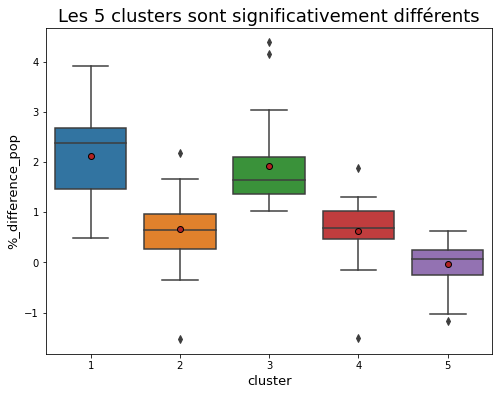

In [300]:
#Box plot %_difference_pop en fonction des clusters
plt.figure(figsize=(8,6))
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot(x="cluster", y="%_difference_pop", showmeans=True, meanprops=meanprops,
            data=DF1_TEST)

plt.title('Les 5 clusters sont significativement différents', size=18)

In [301]:
#Projections age et categ
df3= DF1_TEST[['cluster', '%_difference_pop']]
df3

,cluster,%_difference_pop
0,1,2.580559
1,3,1.427048
2,2,-0.078644
3,3,2.066020
4,2,0.565298
...,...,...
164,3,1.348363
165,1,1.784233
166,2,0.640454
167,1,2.699196


In [302]:
#Les valeurs uniques de colonne cluster
grps = pd.unique(DF1_TEST['cluster'].values)
grps

# création dictionnaire entre cluster et %_difference_pop
d_data = {grp:df['%_difference_pop'][DF1_TEST.cluster == grp].values for grp in grps}
d_data

{1: array([2.5805591 , 3.37793304, 1.08133993, 2.00054289, 1.45977859,
        2.09034552, 2.93285124, 2.78824804, 1.19551916, 1.54202415,
        2.67284669, 2.60369404, 2.58056283, 1.61337194, 0.50329288,
        0.97037702, 3.01283304, 2.24538778, 2.00137731, 2.80352654,
        2.56390117, 1.31365677, 1.70654097, 1.06903326, 1.18314071,
        2.57343291, 2.42351865, 2.38445162, 0.79516923, 1.56517154,
        2.51679279, 2.71603579, 2.70231313, 2.94316121, 1.89097725,
        1.28300103, 3.9135496 , 2.6419626 , 1.35437837, 3.82711668,
        2.09931329, 1.45577309, 2.674904  , 1.28545582, 0.48269951,
        3.03700921, 1.89932589, 2.1775645 , 2.42414569, 0.50834468,
        0.9931137 , 2.84009359, 2.50116003, 3.12526182, 1.96589819,
        2.51026971, 2.57967161, 2.45363975, 2.99533228, 1.47010085,
        1.78423297, 2.69919557, 2.67983986]),
 3: array([1.42704774, 2.06602042, 2.02731214, 1.1224276 , 1.43538358,
        1.5252501 , 1.03279006, 2.83633901, 1.39496523, 1.899798

## Test ANOVA Unidirectionnel pour savoir si au moins un clusters est différent des autres 

In [303]:
#Teste anova si les moyennes de deux échantillons indépendants ou plus sont significativement différentes.

#Hypothèse :
#Les observations de chaque échantillon sont normalement distribuées.
#Les observations dans chaque échantillon ont la même variance.

#Interpretation:
#H0: les moyennes des échantillons sont égales.
#H1: une ou plusieurs des moyennes des échantillons sont inégales.
from scipy.stats import f_oneway
stat, p = f_oneway(d_data[1], d_data[2],  d_data[3],  d_data[4], d_data[5])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('les 5 clusters sont significativements les memes')
else:
    print('les 5 clusters sont significativements différents')
    
    


stat=60.190, p=0.000
les 5 clusters sont significativements différents


## Test non paramétriques car la variance égales n'est pas respecté dans tous les échantillons  (Kruskal-Wallis H)

In [304]:
from scipy import stats

#Hypothèses

#Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique (iid).
#Les observations de chaque échantillon peuvent être classées.


#Interprétation:
#H0 : toutes les distributions d'échantillons sont égales.
#H1 : une ou plusieurs distributions d'échantillon ne sont pas égales.

a = d_data[1]
b =d_data[2]
c= d_data[3]
d = d_data[4]
e = d_data[5]
stats.kruskal(a, b, c, d,e)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('les 5 clusters sont significativements les memes')
else:
    print('les 5 clusters sont significativements différents')
    


stat=60.190, p=0.000
les 5 clusters sont significativements différents


# Test Tukey et bonferroni comparaisons multiples par paires

In [305]:
#Test bonferroni comparaisons multiples par paires pour les clusters
import scikit_posthocs as sp

data = [d_data[1], d_data[2], d_data[3],d_data[4],d_data[5]]
bonferroni= sp.posthoc_dunn(data, p_adjust = 'bonferroni')
bonferroni

,1,2,3,4,5
1,1.000000e+00,5.632949e-09,1.000000e+00,0.000015,1.205790e-19
2,5.632949e-09,1.000000e+00,9.307907e-05,1.000000,4.447220e-02
3,1.000000e+00,9.307907e-05,1.000000e+00,0.002159,1.835871e-11
4,1.537434e-05,1.000000e+00,2.159169e-03,1.000000,2.329471e-01
5,1.205790e-19,4.447220e-02,1.835871e-11,0.232947,1.000000e+00


clusters 1 et 3 ainsi que 2 et 4 ne sont pas significativement différents


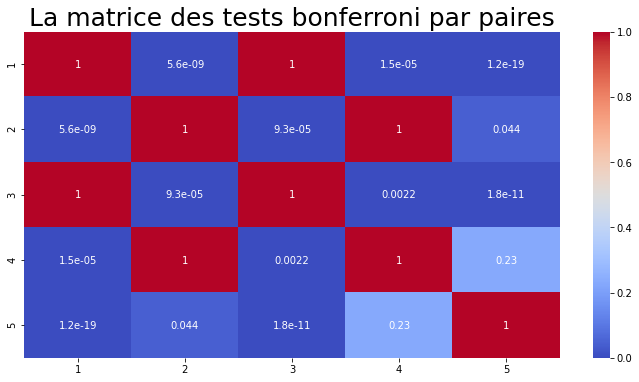

In [306]:
# Visualisation de la matrice Test bonferroni comparaisons multiples par paires pour les clusters
plt.figure(figsize=(12,6))
sns.heatmap(bonferroni, annot=True, cmap='coolwarm')
plt.title('La matrice des tests bonferroni par paires', size=25)
print('clusters 1 et 3 ainsi que 2 et 4 ne sont pas significativement différents' )

In [307]:
#Test Tukey comparaisons multiples par paires pour les clusters
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(DF1_TEST['%_difference_pop'], DF1_TEST[ 'cluster'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.4641,0.001,-1.899,-1.0291,True
1,3,-0.1975,0.7502,-0.6693,0.2743,False
1,4,-1.5081,0.001,-2.0747,-0.9415,True
1,5,-2.1659,0.001,-2.61,-1.7219,True
2,3,1.2666,0.001,0.7358,1.7973,True
2,4,-0.044,0.9,-0.6606,0.5726,False
2,5,-0.7018,0.0017,-1.2081,-0.1956,True
3,4,-1.3106,0.001,-1.9537,-0.6674,True
3,5,-1.9684,0.001,-2.5067,-1.4301,True
4,5,-0.6578,0.0329,-1.2809,-0.0347,True


clusters 1 et 3 ainsi que 2 et 4 ne sont pas significativement différents


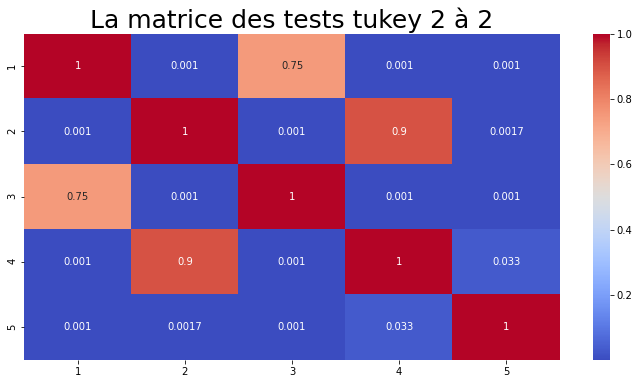

In [308]:
#Visualisation de la matrice Test Tukey comparaisons multiples par paires pour les clusters
data = [d_data[1], d_data[2], d_data[3],d_data[4],d_data[5]]
tukey = sp.posthoc_tukey(data)
plt.figure(figsize=(12,6))
sns.heatmap(tukey, annot=True, cmap='coolwarm')
plt.title('La matrice des tests tukey 2 à 2', size=25)
print('clusters 1 et 3 ainsi que 2 et 4 ne sont pas significativement différents' )

# Conlusion: Les clusters 1 et 3 ne sont pas différents significativement et clusters 2 et 4 aussi pour la croissance population . 